# Pré-Processamento de Dados

In [1]:
print('Bem vindo ao Machine Learning')

Bem vindo ao Machine Learning


## Bibliotecas usadas:

In [252]:
# Importa a biblioteca pandas, amplamente utilizada para análise e manipulação de dados em Python.
import pandas as pd

import numpy as np

# O módulo 'os' fornece funções para interagir com o sistema operacional,
# como manipulação de arquivos, diretórios e variáveis de ambiente.
import os

# O módulo 'tarfile' permite ler e escrever arquivos compactados no formato .tar, .tar.gz, .tgz, etc.
# É útil para extrair ou criar arquivos compactados.
import tarfile

# O módulo 'urllib' oferece funções para manipular URLs e fazer requisições HTTP,
# como baixar arquivos da internet.
import urllib

# Importa a biblioteca Seaborn, que é utilizada para criação de gráficos estatísticos,
# tornando a visualização de dados mais simples e visualmente agradável.
import seaborn as sns

# Importa o módulo pyplot da biblioteca Matplotlib, que fornece funções para gerar gráficos
# como linha, dispersão, barras, histogramas, entre outros, e permite controle total sobre eles.
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

# Importando a biblioteca necessária
from sklearn.impute import KNNImputer

from sklearn.metrics import mean_squared_error

# Import necessário
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Normalizar os dados antes de aplicar KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tabulate import tabulate


Não tem o pacote 😭? eu te mostro como instalar:

```python
!pip install nome_do_pacote
```

## Obtenção dos Dados

Pacotes usados:

```python
# Importa a biblioteca pandas, amplamente utilizada para análise e manipulação de dados em Python.
import pandas as pd

# O módulo 'os' fornece funções para interagir com o sistema operacional,
# como manipulação de arquivos, diretórios e variáveis de ambiente.
import os

# O módulo 'tarfile' permite ler e escrever arquivos compactados no formato .tar, .tar.gz, .tgz, etc.
# É útil para extrair ou criar arquivos compactados.
import tarfile

# O módulo 'urllib' oferece funções para manipular URLs e fazer requisições HTTP,
# como baixar arquivos da internet.
import urllib
```

Para este fase da oficina trabalharemos com um conjunto de dados dos imóveis em distritos da Califórnia, considerando uma série de características desses distritos, cada instância é um distrito. Basta fazer o download do arquivo de um arquivo compactado, *housing.tgz*, que contém o arquivo *housing.csv*.

Você poderia usar o navegador para baixar o arquivo, mas é preferível criar uma pequena função para tal. Ter uma função para baixar arquivos é uma boa prática, pois você pode reutilizá-la em outros projetos. Além disso, você pode adicionar funcionalidades extras, como verificar se o arquivo já foi baixado ou não.

As funções abaixo fazem o download do arquivo, descompactam o arquivo e carregam os dados em um DataFrame do Pandas. O arquivo CSV contém informações sobre os preços de imóveis na Califórnia, incluindo características como número de quartos, idade da casa, localização e outros fatores que podem influenciar o preço. Esses dados são frequentemente usados em análises de preços de imóveis e modelos preditivos.

In [98]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
# Define a URL base de onde os dados serão baixados.

HOUSING_PATH = os.path.join('datasets', 'housing')
# Cria um caminho local ('datasets/housing') para armazenar os dados baixados.
# Usa os.path.join para garantir compatibilidade entre sistemas operacionais.

HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'
# Monta a URL completa do arquivo compactado que será baixado,
# juntando a URL base com o caminho do arquivo no repositório.

In [99]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """
    Função responsável por:
    1. Criar uma pasta local para armazenar os dados (se ela não existir).
    2. Baixar um arquivo compactado (.tgz) de um repositório online.
    3. Extrair esse arquivo para a pasta especificada.

    Parâmetros:
    - housing_url: URL onde está localizado o arquivo compactado com os dados.
    - housing_path: Caminho local onde os dados serão salvos e extraídos.
    """
    
    # Cria o diretório onde os dados serão armazenados.
    # Se o diretório já existir, 'exist_ok=True' evita que um erro seja gerado.
    os.makedirs(housing_path, exist_ok=True)

    # Define o caminho completo onde o arquivo .tgz será salvo localmente.
    # Junta o caminho da pasta com o nome do arquivo.
    tgz_path = os.path.join(housing_path, 'housing.tgz')

    # Faz o download do arquivo a partir da URL especificada.
    # Salva o arquivo compactado no caminho definido por 'tgz_path'.
    urllib.request.urlretrieve(housing_url, tgz_path)

    # Abre o arquivo compactado (.tgz) para leitura.
    housing_tgz = tarfile.open(tgz_path)

    # Extrai todo o conteúdo do arquivo compactado para a pasta definida.
    housing_tgz.extractall(path=housing_path)

    # Fecha o arquivo .tgz para liberar recursos do sistema.
    housing_tgz.close()


Quando chamamos `fetch_housing_data()` cria um diretório *datasets/housing* em seu workspace, baixa o arquivo *housing.tgz* e extrai o arquivo *housing.csv* nesse diretório.

In [100]:
fetch_housing_data()

Quando chamamos `fetch_housing_data()`, ele cria um diretório chamado `datasets/housings` em seu workspace, faz o download do arquivo *housing.tgz* e extrai o arquivo *housing.csv* para esse diretório. Agora carregaremos carregaremos os dados com o Pandas. Mais uma vez, você deve descrever uma pequena função para carregá-los:

In [101]:
def load_housing_data(housing_path=HOUSING_PATH):
    """
    Função responsável por carregar os dados de habitação (housing) que estão armazenados em um arquivo CSV.
    
    Parâmetros:
    - housing_path: Caminho da pasta onde o arquivo 'housing.csv' está localizado.
    
    Retorna:
    - Um DataFrame do pandas contendo os dados carregados do arquivo CSV.
    """

    # Define o caminho completo do arquivo CSV, unindo o caminho da pasta com o nome do arquivo.
    csv_path = os.path.join(housing_path, 'housing.csv')

    # Usa a função read_csv do pandas para ler o arquivo CSV localizado em 'csv_path'.
    # Retorna o conteúdo como um DataFrame, que é uma estrutura de dados tabular (tabelas) muito poderosa no pandas.
    return pd.read_csv(csv_path)


Vamos olhar as 5 primeiras linhas do DataFrame que iremos carregar:

In [102]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [103]:
for i, col in enumerate(housing.columns):
    print(f'Variável {i+1}: {col}')

Variável 1: longitude
Variável 2: latitude
Variável 3: housing_median_age
Variável 4: total_rooms
Variável 5: total_bedrooms
Variável 6: population
Variável 7: households
Variável 8: median_income
Variável 9: median_house_value
Variável 10: ocean_proximity


---
**Descrição das Variáveis do Dataset Housing:**

- **Variável 1:** `longitude` — Longitude da localização.
- **Variável 2:** `latitude` — Latitude da localização.
- **Variável 3:** `housing_median_age` — Mediana da idade das construções residenciais naquela área.
- **Variável 4:** `total_rooms` — Número total de cômodos (rooms) nas residências da área.
- **Variável 5:** `total_bedrooms` — Número total de quartos nas residências da área.
- **Variável 6:** `population` — População da área.
- **Variável 7:** `households` — Número de domicílios (households) na área.
- **Variável 8:** `median_income` — Renda mediana dos moradores da área (em dezenas de milhares de dólares).
- **Variável 9:** `median_house_value` — Valor mediano das residências naquela área (em dólares).
- **Variável 10:** `ocean_proximity` — Proximidade com o oceano (categorias como "INLAND", "NEAR OCEAN", etc.).
---

## Pré-Análise Exploratória dos Dados

Pacotes usados:

```python
# Importa a biblioteca Seaborn, que é utilizada para criação de gráficos estatísticos,
# tornando a visualização de dados mais simples e visualmente agradável.
import seaborn as sns

# Importa o módulo pyplot da biblioteca Matplotlib, que fornece funções para gerar gráficos
# como linha, dispersão, barras, histogramas, entre outros, e permite controle total sobre eles.
import matplotlib.pyplot as plt
```

### Agora o momento de investigação dos dados 🔍- *MUITA ATENÇÃO*

In [104]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [233]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


O ``info()`` é bom, entretanto podemos ter uma análise mais minuciosa quanto ao tipo e quantidade de instâncias, vamos criar uma função para isso:

In [105]:
# Definição da classe DataAnalyzer
class DataAnalyzer:
    def __init__(self, df):
        """
        Inicializa o analisador com um DataFrame.
        
        Parâmetros:
        - df: pandas DataFrame que será utilizado para análise, logo ele já tem de estar importado no ambiente.
        
        Atributos criados:
        - self.df: guarda o DataFrame passado na criação do objeto.
        - self.total: guarda a quantidade total de observações (linhas) do DataFrame.
        """
        self.df = df
        self.total = len(df)

    def tipos_variaveis(self):
        """
        Mostra a contagem dos tipos de variáveis presentes no DataFrame.
        
        Funcionalidade:
        - Conta quantas variáveis são de cada tipo (ex.: int64, float64, object, etc.).
        - Exibe os resultados formatados visualmente, com separadores e emojis.
        """
        print('='*50)  # Linha de separação
        print('📊 Tipos de Variáveis:')  # Título da seção
        print('-'*50)  # Linha de separação
        print(self.df.dtypes.value_counts())  # Conta e exibe os tipos de dados das colunas
        print('='*50)  # Linha de fechamento

    def analise_dados_nulos(self):
        """
        Realiza uma análise de dados nulos no DataFrame.
        
        Funcionalidade:
        - Mostra para cada coluna:
            - Quantidade de valores não nulos.
            - Quantidade de valores nulos.
            - Porcentagem de valores não nulos.
            - Porcentagem de valores nulos.
        - Organiza essas informações em formato tabular, bem alinhado.
        """
        print('='*50)
        print('🔍 Análise de Dados Nulos:')
        print('-'*50)

        # Cria um DataFrame auxiliar com as informações de nulos e não nulos
        dados_nulos = pd.DataFrame({
            'Não Nulos': self.df.notnull().sum(),  # Quantidade de não nulos por coluna
            'Nulos': self.df.isnull().sum(),  # Quantidade de nulos por coluna
            'Porcentagem Não Nulos (%)': (self.df.notnull().sum() / self.total * 100).round(2),  # Porcentagem de não nulos
            'Porcentagem Nulos (%)': (self.df.isnull().sum() / self.total * 100).round(2)  # Porcentagem de nulos
        })

        # Exibe o DataFrame de dados nulos em formato string, alinhado como tabela
        print(dados_nulos.to_string())  # Essa linha faz com que a tabela fique alinhada horizontalmente, sem quebra
        print('='*50)  # Linha de fechamento


In [106]:
DataAnalyzer(housing).tipos_variaveis()

📊 Tipos de Variáveis:
--------------------------------------------------
float64    9
object     1
Name: count, dtype: int64


In [107]:
DataAnalyzer(housing).analise_dados_nulos()

🔍 Análise de Dados Nulos:
--------------------------------------------------
                    Não Nulos  Nulos  Porcentagem Não Nulos (%)  Porcentagem Nulos (%)
longitude               20640      0                      100.0                    0.0
latitude                20640      0                      100.0                    0.0
housing_median_age      20640      0                      100.0                    0.0
total_rooms             20640      0                      100.0                    0.0
total_bedrooms          20433    207                       99.0                    1.0
population              20640      0                      100.0                    0.0
households              20640      0                      100.0                    0.0
median_income           20640      0                      100.0                    0.0
median_house_value      20640      0                      100.0                    0.0
ocean_proximity         20640      0                 

Vamos enxergar melhor as NAs:

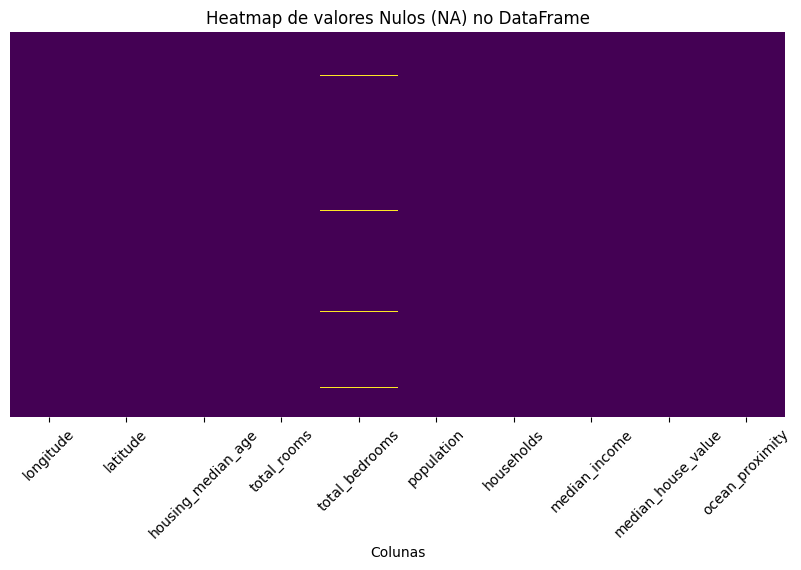

In [108]:
# Cria uma nova figura para o gráfico, definindo o tamanho (largura=10, altura=5).
plt.figure(figsize=(10, 5))

# Gera um heatmap (mapa de calor) utilizando seaborn.
# O DataFrame housing.isnull() retorna True para valores nulos e False para não nulos.
# Cada quadrado do heatmap representa se há (ou não) um valor nulo na respectiva célula.
# cbar=False remove a barra de cores lateral (opcional).
# cmap='viridis' define o esquema de cores (pode ser 'viridis', 'magma', 'coolwarm', etc.).
# yticklabels=False remove os rótulos dos índices no eixo Y (para deixar o gráfico mais limpo).
sns.heatmap(housing.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Adiciona um título ao gráfico.
plt.title('Heatmap de valores Nulos (NA) no DataFrame')

# Define o rótulo (label) do eixo X, que representa as colunas do DataFrame.
plt.xlabel('Colunas')

# Rotaciona os nomes das colunas no eixo X para 45 graus,
# facilitando a leitura quando os nomes são longos ou numerosos.
plt.xticks(rotation=45)

plt.show()


A maioria dos algoritmos de aprendizado de máquina não lidam bem com dados ausentes. Portanto, é importante identificar e tratar esses dados antes de prosseguir com a análise ou modelagem. O tratamento de dados ausentes pode incluir a remoção de linhas ou colunas que contêm valores ausentes, ou o preenchimento desses valores com estimativas apropriadas.

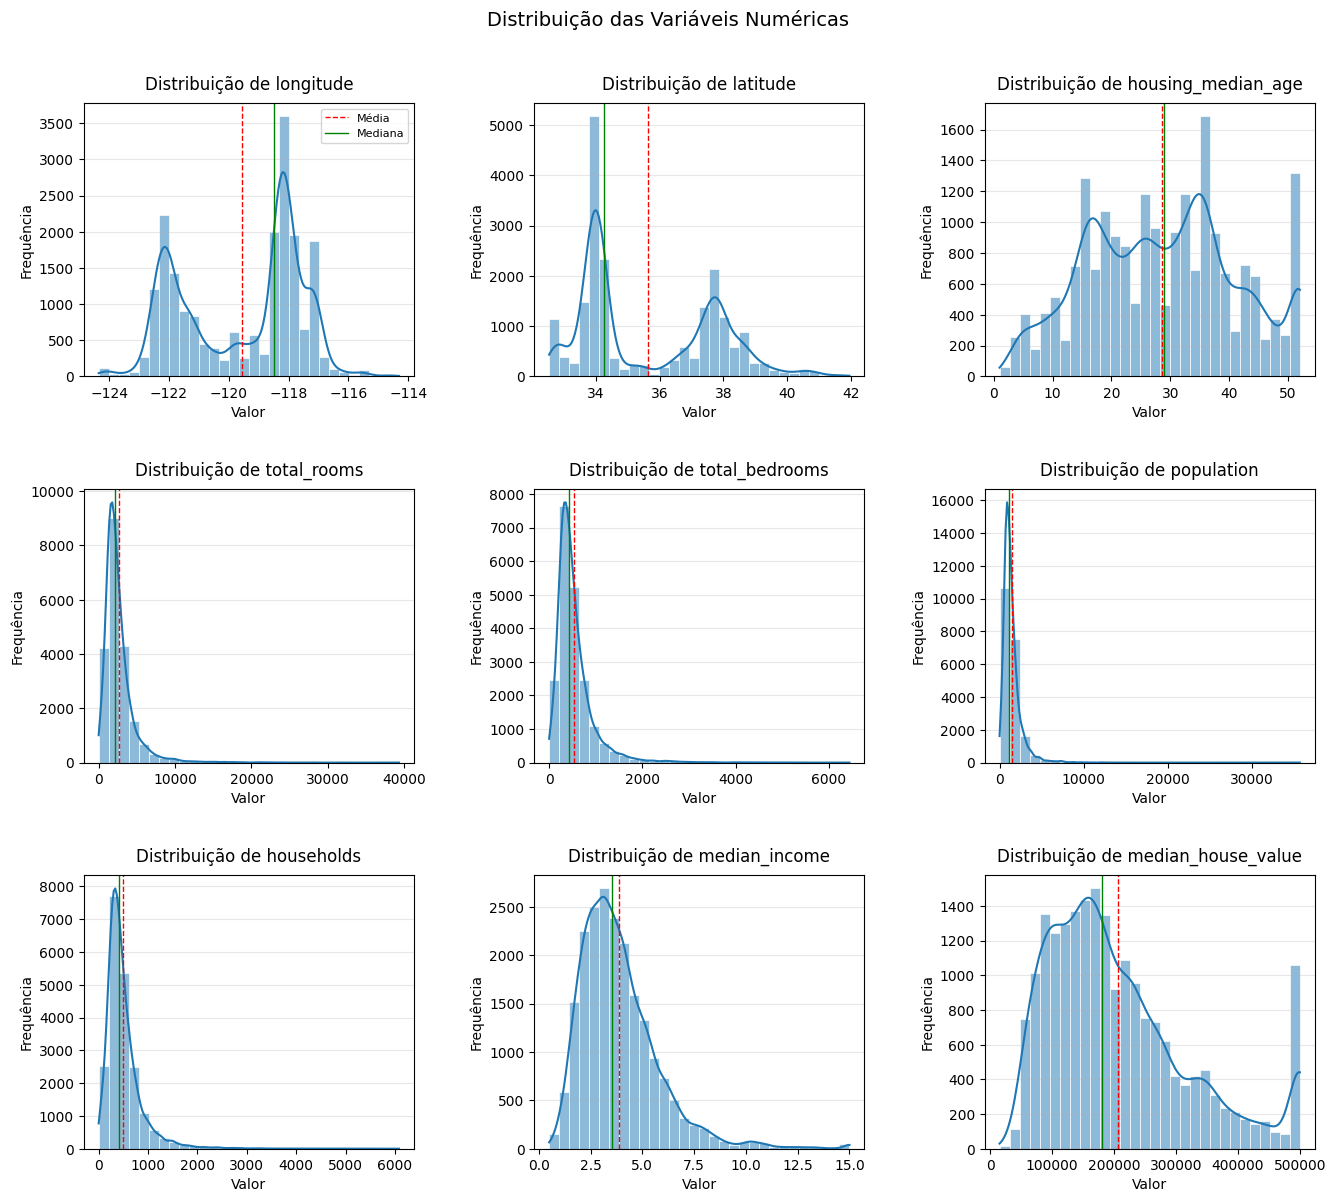

In [144]:
# 1. Selecionar colunas numéricas automaticamente
numeric_cols = housing.select_dtypes(include=['number']).columns.tolist()

# 2. Configuração do gráfico
n_cols = 3  # Número de colunas no grid
n_rows = len(numeric_cols) // n_cols  # Calcula linhas necessárias

plt.figure(figsize=(14, 4*n_rows))  # Ajuste automático de altura

# 3. Criar histogramas para cada variável
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Histograma com KDE
    sns.histplot(housing[col], 
                 bins=30, 
                 kde=True, 
                 color='#1f77b4',  # Azul matplotlib
                 edgecolor='white',
                 linewidth=0.5)
    
    # Customização
    plt.title(f'Distribuição de {col}', fontsize=12, pad=10)
    plt.xlabel('Valor', fontsize=10)
    plt.ylabel('Frequência', fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # Adicionar linhas de referência
    plt.axvline(housing[col].mean(), color='red', linestyle='--', linewidth=1, label='Média')
    plt.axvline(housing[col].median(), color='green', linestyle='-', linewidth=1, label='Mediana')
    
    if i == 1:  # Legenda apenas no primeiro gráfico
        plt.legend(fontsize=8)

plt.tight_layout(pad=3.0)  # Espaçamento entre subplots
plt.suptitle('Distribuição das Variáveis Numéricas', y=1.02, fontsize=14)
plt.show()

Podemos observar distribuições assimétricas em todos os gráficos

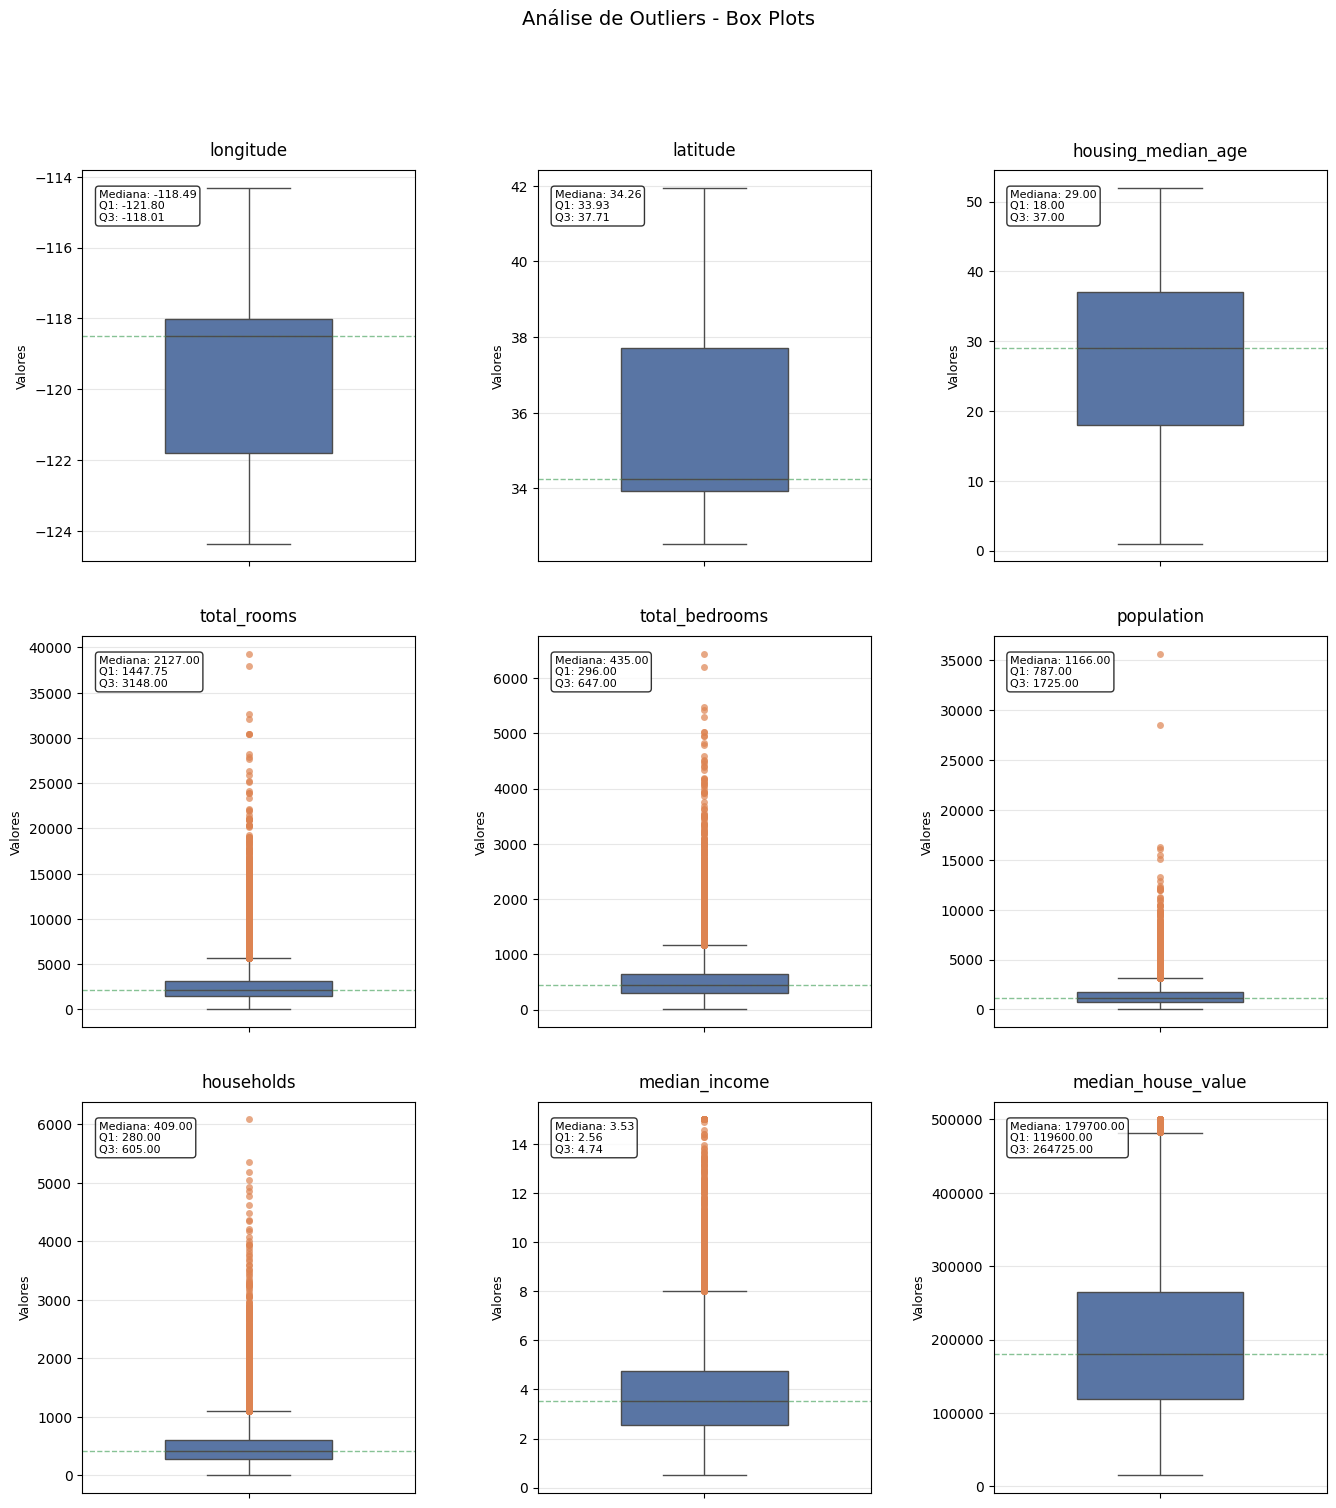

In [147]:
plt.figure(figsize=(14, 5*n_rows))
plt.suptitle('Análise de Outliers - Box Plots', y=1.02, fontsize=14)

# 3. Criar box plots para cada variável
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Box plot customizado
    sns.boxplot(y=housing[col], 
                color='#4C72B0', 
                width=0.5,
                flierprops=dict(marker='o', 
                               markersize=5,
                               markerfacecolor='#DD8452',
                               markeredgecolor='none',
                               alpha=0.7))
    
    # Adicionar linha da mediana
    median = housing[col].median()
    plt.axhline(median, color='#55A868', linestyle='--', linewidth=1, alpha=0.7)
    
    # Customização
    plt.title(col, fontsize=12, pad=10)
    plt.ylabel('Valores', fontsize=9)
    plt.grid(axis='y', alpha=0.3)
    
    # Anotar estatísticas
    stats = housing[col].describe()
    textstr = f"Mediana: {median:.2f}\nQ1: {stats['25%']:.2f}\nQ3: {stats['75%']:.2f}"
    plt.text(0.05, 0.95, textstr, 
             transform=plt.gca().transAxes,
             fontsize=8,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()

## Limpeza e Tratamento dos Dados

Pacotes usados:

```python
from IPython.display import display, Markdown

# 📦 Importando a biblioteca necessária
from sklearn.impute import KNNImputer

import numpy as np

import pandas as pd

from sklearn.impute import KNNImputer

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Import necessário
from sklearn.model_selection import train_test_split
```

### **Data Imputation**

Uma decisão crucial que você deve tomar é o que fazer com os dados ausentes. Você pode optar por remover as linhas ou colunas que contêm valores ausentes, ou pode preencher esses valores com a média, mediana ou outro valor apropriado. A escolha depende do contexto dos dados e do impacto que os valores ausentes podem ter na análise. Para esta oficina, vamos optar por preencher os valores ausentes (NAs) com algum estimador, porém vamos mostrar como remover as linhas ou colunas com NAs também.

Antes disso, temos que entender o que é imputação de dados. A imputação de dados é o processo de substituir valores ausentes em um conjunto de dados por valores estimados. Isso é importante porque muitos algoritmos de aprendizado de máquina não podem lidar com dados ausentes e, portanto, a imputação é uma etapa crucial no pré-processamento dos dados.
A imputação pode ser feita de várias maneiras, incluindo:
- **Média/Mediana/Moda:** Substituir valores ausentes pela média, mediana ou moda da coluna.
- **KNNImputer:** Usar o algoritmo K-Nearest Neighbors para prever valores ausentes com base em valores de instâncias semelhantes.
- **Regressão:** Usar um modelo de regressão para prever valores ausentes com base em outras variáveis.

#### 🎯 Design do Scikit-Learn

A API do Scikit-Learn é notavelmente bem projetada. Estes são os principais princípios de design:

---

##### ✅ Consistência

Todos os objetos compartilham uma interface consistente e simples.

---

##### **Estimadores**

Qualquer objeto que possa estimar alguns parâmetros com base em um conjunto de dados é chamado de **estimador** (por exemplo, um `SimpleImputer` é um estimador).  

- A estimativa é realizada pelo método `fit()`, que recebe um conjunto de dados como parâmetro.  
- Para algoritmos de aprendizado supervisionado, o `fit()` recebe dois conjuntos de dados: um com as amostras e outro com os rótulos (*labels*).  
- Qualquer outro parâmetro necessário para orientar o processo de estimativa é chamado de **hiperparâmetro** (por exemplo, a estratégia do `SimpleImputer`), e deve ser definido como uma variável de instância (geralmente por meio de um parâmetro do construtor).

---

##### **Transformadores**

Alguns estimadores (como o `SimpleImputer`) também podem **transformar** um conjunto de dados; estes são chamados de **transformadores**.

- A transformação é feita pelo método `transform()`, que recebe o conjunto de dados a ser transformado e retorna o conjunto transformado.  
- Essa transformação geralmente depende dos parâmetros aprendidos durante o `fit()`, como acontece com o `SimpleImputer`.  
- Todos os transformadores possuem também o método `fit_transform()`, que é equivalente a chamar `fit()` seguido de `transform()`.  
  - **Obs:** em alguns casos, `fit_transform()` é otimizado e executa muito mais rápido do que chamar os dois métodos separadamente.

---

##### **Preditores**

Alguns estimadores são capazes de fazer **previsões**; estes são chamados de **preditores**.

- Por exemplo, o modelo `LinearRegression` é um preditor: dado o PIB per capita de um país, ele prevê o nível de satisfação com a vida.  
- Um preditor possui o método `predict()`, que recebe um conjunto de novas instâncias e retorna as previsões correspondentes.  
- Ele também possui o método `score()`, que mede a qualidade das previsões, dado um conjunto de teste (e os rótulos correspondentes, no caso de aprendizado supervisionado).

---

##### ✅ Inspeção

- Todos os **hiperparâmetros** de um estimador são acessíveis diretamente via variáveis públicas de instância (por exemplo, `imputer.strategy`).  
- Todos os **parâmetros aprendidos** são acessíveis via variáveis públicas de instância com um **sufixo de sublinhado** (por exemplo, `imputer.statistics_`).

---

##### ✅ Não proliferação de classes

- Conjuntos de dados são representados como arrays do **NumPy** ou matrizes esparsas do **SciPy**, em vez de classes personalizadas.  
- Hiperparâmetros são apenas strings ou números comuns do Python.

---

##### ✅ Composição

- Blocos de construção existentes são reutilizados sempre que possível.  
- Por exemplo, é fácil criar um **Pipeline** (fluxo de processamento) a partir de uma sequência arbitrária de transformadores seguida por um estimador final.

---

##### ✅ Valores padrão sensatos

- O Scikit-Learn fornece valores padrão razoáveis para a maioria dos parâmetros.  
- Isso facilita a criação rápida de um sistema funcional básico (*baseline*).



#### 1° Opção: Remover instâncias com NAs:

In [56]:
# Cria um novo DataFrame chamado 'housing_not_na' onde as linhas que possuem
# valores nulos (NaN) na coluna 'total_bedrooms' são removidas.

housing_not_na = housing.dropna(
    subset=['total_bedrooms'],  # Define que a verificação de nulos será feita apenas na coluna 'total_bedrooms'.
    inplace=False                # inplace=False garante que o DataFrame original (housing) não será modificado,
                                 # e sim retornará um novo DataFrame com as linhas sem nulos nessa coluna.
)

In [55]:
DataAnalyzer(housing_not_na).analise_dados_nulos()

🔍 Análise de Dados Nulos:
--------------------------------------------------
                    Não Nulos  Nulos  Porcentagem Não Nulos (%)  Porcentagem Nulos (%)
longitude               20433      0                      100.0                    0.0
latitude                20433      0                      100.0                    0.0
housing_median_age      20433      0                      100.0                    0.0
total_rooms             20433      0                      100.0                    0.0
total_bedrooms          20433      0                      100.0                    0.0
population              20433      0                      100.0                    0.0
households              20433      0                      100.0                    0.0
median_income           20433      0                      100.0                    0.0
median_house_value      20433      0                      100.0                    0.0
ocean_proximity         20433      0                 

#### 2° Opção: Remover colunas com NAs:

In [57]:
# Cria um novo DataFrame chamado 'housing_not_na' removendo a coluna 'total_bedrooms' do DataFrame original.

housing_not_na = housing.drop(
    'total_bedrooms',  # Especifica qual coluna será removida. Neste caso, 'total_bedrooms'.
    axis=1,             # axis=1 indica que estamos removendo uma COLUNA (se fosse axis=0, seria uma LINHA).
    inplace=False       # inplace=False garante que a operação não altera o DataFrame original (housing),
                        # mas retorna um novo DataFrame com a coluna removida.
)

In [58]:
DataAnalyzer(housing_not_na).analise_dados_nulos()

🔍 Análise de Dados Nulos:
--------------------------------------------------
                    Não Nulos  Nulos  Porcentagem Não Nulos (%)  Porcentagem Nulos (%)
longitude               20640      0                      100.0                    0.0
latitude                20640      0                      100.0                    0.0
housing_median_age      20640      0                      100.0                    0.0
total_rooms             20640      0                      100.0                    0.0
population              20640      0                      100.0                    0.0
households              20640      0                      100.0                    0.0
median_income           20640      0                      100.0                    0.0
median_house_value      20640      0                      100.0                    0.0
ocean_proximity         20640      0                      100.0                    0.0


#### 3° Opção: Preencher NAs com a alguma medida de tendência central da coluna:

In [ ]:
# ✅ Calculando a média da coluna 'total_bedrooms'
# A função .mean() calcula a média aritmética dos valores numéricos, ignorando automaticamente os valores NaN
mean = housing['total_bedrooms'].mean()

# ✅ Fazendo uma cópia do dataframe original para não alterar os dados originais
housing_mean = housing.copy()

# ✅ Substituindo os valores ausentes (NaN) da coluna 'total_bedrooms' pela média calculada
# A função .fillna(mean) preenche todas as células que estão com NaN com o valor da média
housing_mean['total_bedrooms'] = housing_mean['total_bedrooms'].fillna(mean)

# ✅ Verificando quantos valores ausentes ainda existem na coluna 'total_bedrooms' após a imputação
# A função .isnull().sum() retorna a quantidade de valores que ainda são NaN (se tudo deu certo, deve ser zero)
na_mean = housing_mean['total_bedrooms'].isnull().sum()

In [ ]:
# Calcula a mediana da coluna 'total_bedrooms' do DataFrame 'housing'
# A mediana é uma medida de tendência central que é menos sensível a valores extremos do que a média.
median = housing['total_bedrooms'].median()

# Cria uma cópia do DataFrame original 'housing' para não modificar os dados originais
housing_median = housing.copy()

# Substitui os valores ausentes (NaN) da coluna 'total_bedrooms' pela mediana calculada
# O método fillna() preenche valores faltantes, garantindo que não haja dados ausentes nessa coluna.
housing_median['total_bedrooms'] = housing_median['total_bedrooms'].fillna(median)

# Verifica quantos valores ausentes (NaN) ainda existem na coluna 'total_bedrooms' após a substituição
# O método isnull() identifica valores nulos e sum() faz a contagem total deles.
na_median = housing_median['total_bedrooms'].isnull().sum()


In [88]:
# Saída em Markdown
display(Markdown(f"""
## 🔧 Resultado da Imputação de Dados Nulos

- 🧠 Após preencher com **Média**, restam **{na_mean}** valores nulos na coluna `total_bedrooms`.
- 🧠 Após preencher com **Mediana**, restam **{na_median}** valores nulos na coluna `total_bedrooms`.

✅ Ambos os métodos resolveram os dados faltantes, caso o número seja zero.
"""))


## 🔧 Resultado da Imputação de Dados Nulos

- 🧠 Após preencher com **Média**, restam **0** valores nulos na coluna `total_bedrooms`.
- 🧠 Após preencher com **Mediana**, restam **0** valores nulos na coluna `total_bedrooms`.

✅ Ambos os métodos resolveram os dados faltantes, caso o número seja zero.


Esse processo pode ser automatizado com o uso de bibliotecas como o **Scikit-learn**, que fornece uma classe útil que se encarrega de valores ausentes: a ``SimpleImputer``. Essa classe pode ser usada para preencher valores ausentes com a média, mediana ou moda de uma coluna. Vejamos como usá-la: primeiro, você precisa criar uma instância da ``SimpleImputer``, especificando que deseja substituir os valores ausentes de cada atributo pela média/mediana desse atributo:

In [206]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)

SimpleImputer()

A ``imputer`` simplesmente calcula a média de cada coluna e armazena esses valores em sua variável ``statistics_``. Somente o atributo `total_bedrooms` tem valores ausentes, então o imputer calcula a média apenas desse atributo:

In [207]:
imputer.statistics_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05])

In [209]:
housing_num.mean().values

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05])

Agora, você pode usar o método ``transform()`` para preencher os valores ausentes com a média de cada coluna. O método ``transform()`` retorna um novo array NumPy, que contém os dados preenchidos:

In [ ]:
X_ = imputer.transform(housing_num)

Você pode usar o método ``fit_transform()`` para fazer isso em uma única etapa também:

In [ ]:
X_ = imputer.fit_transform(housing_num)

#### 4° Opção: Preencher NAs com a estimação de um modelo

para essa caso usaremos o KNNImputer do Scikit-learn. O KNNImputer é uma técnica de imputação que utiliza o algoritmo K-Nearest Neighbors (KNN) para preencher valores ausentes em um conjunto de dados. Ele funciona identificando os vizinhos mais próximos de uma instância com dados ausentes e usando os valores desses vizinhos para estimar o valor ausente. Essa abordagem é útil quando os dados têm uma estrutura espacial ou temporal, pois considera a similaridade entre as instâncias.

#### 🔢 Demonstração Matemática do KNN e do KNNImputer

##### 📚 **Teoria do KNN (K-Nearest Neighbors)**

O algoritmo KNN é um método baseado em instâncias usado tanto para **classificação quanto regressão**, onde uma amostra desconhecida é classificada ou recebe um valor estimado com base nos seus **K vizinhos mais próximos** no espaço de características.

A base matemática do KNN se fundamenta na ideia de **distâncias** no espaço vetorial, mais frequentemente utilizando a **Distância Euclidiana**, embora outras métricas também possam ser aplicadas (Manhattan, Minkowski, etc.).

---

##### 🔗 **Equação da Distância Euclidiana**

Para dois pontos $X = (x_1, x_2, ..., x_n)$ e $Y = (y_1, y_2, ..., y_n)$ em um espaço $n$-dimensional, a distância euclidiana é calculada como:

$
d(X, Y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$

Essa é a métrica padrão no KNN, pois mede a "reta" que liga dois pontos no espaço.

---

##### 🚩 **Processo Matemático do KNN**

1. Calcular a distância entre o ponto com valor desconhecido e todos os outros pontos do conjunto de dados.
   
2. Ordenar os dados com base na menor distância.

3. Selecionar os **K vizinhos mais próximos**.

4. - **Regressão:** Calcular a **média** dos valores da variável alvo dos K vizinhos:

   $
   \hat{y} = \dfrac{\sum_{i=1}^{K} y_i}{K}
   $

   - **Classificação:** Selecionar a **classe mais frequente** entre os vizinhos.

---

##### 🔧 **Teoria do KNNImputer para Dados Faltantes**

O **KNNImputer** aplica exatamente o mesmo conceito do KNN, mas ao invés de prever uma variável alvo externa, ele preenche os valores **faltantes nas próprias colunas do dataset**.

- Para cada célula com valor ausente:
  1. Localizam-se os **K registros mais próximos** (com base nas outras colunas que têm valores presentes).
  2. Calcula-se a **média dos valores** dos vizinhos na coluna com dados ausentes.
  3. Substitui-se o valor nulo pela média calculada.

---

##### ⚙️ **Fórmula da Imputação**

Dado um valor ausente na coluna $j$ do ponto $x$, o valor imputado é:

$
\hat{x}_j = \frac{\sum_{i=1}^{K} x_{ij}}{K}
$

Onde:

- $x_{ij}$ = valor da coluna $j$ no vizinho $i$.
- $K$ = número de vizinhos considerados.

O processo é repetido para cada valor ausente, considerando as distâncias calculadas **apenas nas colunas que não possuem valores ausentes simultaneamente**.

---

#### ✍️ **Exemplo Manual (Feito na mão)**

Imagine um dataset simplificado com 3 registros e 3 variáveis ($A$, $B$ e $C$):

| Registro | A   | B   | C   |
|----------|-----|-----|-----|
| 1        | 1.0 | 2.0 | 5.0 |
| 2        | 2.0 | NaN | 7.0 |
| 3        | 3.0 | 6.0 | 9.0 |

---

##### ✔️ **Passo 1:** Queremos imputar o valor faltante na linha 2, coluna **B**.

---

##### ✔️ **Passo 2:** Calculamos a distância da linha 2 para as outras linhas utilizando as colunas **A** e **C**, que estão completas.

- **Distância para linha 1:**

$
d = \sqrt{(2 - 1)^2 + (7 - 5)^2} = \sqrt{1 + 4} = \sqrt{5} \approx 2.24
$

- **Distância para linha 3:**

$
d = \sqrt{(2 - 3)^2 + (7 - 9)^2} = \sqrt{1 + 4} = \sqrt{5} \approx 2.24
$

---

##### ✔️ **Passo 3:** Selecionamos os $K = 2$ vizinhos mais próximos (linha 1 e linha 3).

---

##### ✔️ **Passo 4:** Pegamos os valores da coluna **B** dos vizinhos:

- Linha 1 → **B = 2.0**
- Linha 3 → **B = 6.0**

---

##### ✔️ **Passo 5:** Calculamos a média dos vizinhos:

$
\hat{B} = \frac{2.0 + 6.0}{2} = 4.0
$

---

##### ✔️ **Resultado:** O valor **NaN** na linha 2, coluna **B**, será preenchido com **4.0**.

---

##### 🔥 **Vantagens do KNNImputer**

- ✅ Leva em consideração a estrutura dos dados.
- ✅ Mais robusto do que imputação por média ou mediana simples.
- ✅ Considera relações não lineares entre as variáveis.

---

##### ⚠️ **Desvantagens**

- 🚫 Alto custo computacional em datasets grandes.
- 🚫 Sensível à escolha de $K$ (um $K$ muito pequeno ou muito grande pode distorcer os resultados).
- 🚫 Dependente da escala das variáveis (precisa de **normalização ou padronização** antes de aplicar, devido à distância Euclidiana ser sensível à escala).

---

##### 💡 **Observação Importante**

✔️ Antes de aplicar o **KNNImputer**, é **fundamental normalizar ou padronizar os dados**, pois as distâncias podem ser distorcidas se as variáveis estiverem em escalas muito diferentes.

---

##### 📖 **Conclusão**

O KNNImputer é uma técnica poderosa e intuitiva de imputação que funciona bem quando há relações estruturais nos dados. Entretanto, precisa ser usada com cuidado em relação à escolha de $K$ e à normalização dos dados.

---

#### Continuação da 4° Opção

Agora vamos **aplicar o `KNNImputer`** ao nosso conjunto de dados.  

O `KNNImputer` é uma técnica de imputação que preenche valores ausentes com base na média (ou outro critério) dos **valores mais próximos** — ou seja, ele busca os **k vizinhos mais próximos** de cada amostra incompleta e utiliza esses vizinhos para estimar o valor faltante.  

Dessa forma, a imputação leva em conta a **similaridade entre as amostras**, resultando em uma abordagem mais robusta do que simplesmente substituir por médias ou medianas globais.

In [ ]:
# ✅ Selecionando apenas variáveis numéricas do dataframe
# Isso é necessário porque o KNNImputer trabalha apenas com variáveis numéricas
data = housing.select_dtypes(include=[np.number])

# ✅ Separando os dados em dois conjuntos:
# 1. Dados COM valores na coluna 'total_bedrooms' (CNA = Complete No NA)
#    -> Usado para treino e validação do modelo de imputação
data_cna = data.dropna(subset=['total_bedrooms'])

# 2. Dados COM valores ausentes na coluna 'total_bedrooms'
#    -> Este será o conjunto onde aplicaremos o modelo treinado para imputar os NAs reais
data_na = data[data['total_bedrooms'].isna()]

# ✅ Verificando o tamanho dos dois conjuntos
print(f"Shape dos dados completos (CNA): {data_cna.shape}")
print(f"Shape dos dados com NA em total_bedrooms: {data_na.shape}")

# ✅ Reduzindo o dataset completo (CNA) para 8.000 observações de forma aleatória
# Isso é útil para acelerar o processamento e testes
# np.random.seed(42) define uma semente aleatória para garantir que os resultados sejam reproduzíveis
np.random.seed(42)
data_cna_reduzido = data_cna.sample(n=8000)

# ✅ Confirmando o tamanho do dataset reduzido
print(f"Shape dos dados CNA reduzidos: {data_cna_reduzido.shape}")

# ✅ Definindo as variáveis para a modelagem:
# X -> todas as variáveis independentes (exceto 'total_bedrooms')
# y -> variável dependente, que será imputada (total_bedrooms)
X = data_cna_reduzido.drop(columns=['total_bedrooms'])
y = data_cna_reduzido['total_bedrooms']

Shape dos dados completos (CNA): (20433, 9)
Shape dos dados com NA em total_bedrooms: (207, 9)
Shape dos dados CNA reduzidos: (8000, 9)


In [ ]:
# 🎯 Elbow Method com Validação Cruzada (4 Folds) para KNN Imputer

# Lista para armazenar os RMSE médios de cada valor de K testado
rmse_values = []

# Definindo os valores de K que serão testados (de 1 a 10)
k_values = range(1, 11)

# 🔄 Definindo o método de Validação Cruzada:
# - n_splits=4 → divide o dataset em 4 partes
# - shuffle=True → embaralha os dados antes de dividir (garante aleatoriedade)
# - random_state=42 → fixa a semente para garantir resultados reproduzíveis
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Loop externo: testa cada valor de K (número de vizinhos)
for k in k_values:
    fold_rmse = []  # Lista para armazenar os RMSE de cada fold (validação)

    # Loop interno: executa a validação cruzada (4 folds)
    for train_idx, test_idx in kf.split(X):
        # 🔧 Separando os dados de treino e teste com base nos índices dos folds
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # 🛠️ Criando os dataframes de treino e teste com a coluna alvo 'total_bedrooms'
        # Dados de treino possuem 'total_bedrooms' conhecido
        train_data = X_train.copy()
        train_data['total_bedrooms'] = y_train

        # Dados de teste simulam NA na coluna alvo (como se precisássemos imputar)
        test_data = X_test.copy()
        test_data['total_bedrooms'] = np.nan

        # 🔗 Concatenando treino + teste para que o KNN Imputer busque os vizinhos no conjunto inteiro
        combined = pd.concat([train_data, test_data])

        # 🔥 Escalonamento:
        # - O KNN é sensível às escalas das variáveis.
        # - StandardScaler padroniza os dados para média 0 e desvio padrão 1.
        scaler = StandardScaler()
        combined_scaled = scaler.fit_transform(combined)

        # 🚀 Aplicando KNN Imputer:
        # - n_neighbors=k → número de vizinhos considerados para imputação
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(combined_scaled)

        # 🔍 Separando os dados de teste imputados:
        # - imputed[-len(X_test):, -1]:
        #   -> Seleciona as últimas 'len(X_test)' linhas do array 'imputed'.
        #   -> O índice negativo -len(X_test) significa: "comece a selecionar a partir desta posição contando de trás pra frente".
        #   -> Isso garante que estamos pegando exatamente as linhas do conjunto de teste, assumindo que ele foi concatenado no final.
        #   -> O -1 seleciona a última coluna ('total_bedrooms').
        imputed_test = imputed[-len(X_test):, -1]

        # ✅ Calculando o RMSE (Root Mean Squared Error - Erro Quadrático Médio):
        # - Antes de comparar as previsões (imputed_test) com os valores reais (y_test),
        #   é necessário DESFAZER o escalonamento que foi aplicado anteriormente com o StandardScaler.
        # 
        # - Fórmula para reverter o StandardScaler:
        #     valor_original = valor_escalado * desvio_padrao + media
        #
        # - Aqui usamos:
        #   scaler.scale_[-1]: seleciona o desvio padrão da última coluna ('total_bedrooms').   
        #   scaler.mean_[-1]: seleciona a média da última coluna ('total_bedrooms').
        #
        # ✅ Por que usamos o índice -1?
        #   -> O índice -1 sempre aponta para o último elemento de uma lista ou array.
        #   -> Como 'total_bedrooms' é a última coluna do dataset transformado, pegamos os parâmetros de escalonamento
        #      (desvio padrão e média) correspondentes a essa coluna.
        #
        # ❗ Se usássemos índices positivos, teríamos que contar a posição exata, o que é mais propenso a erro
        #     se o número ou a ordem das colunas mudar.
        #
        # - Após desfazer o escalonamento, calculamos o RMSE para avaliar o erro da imputação.
        rmse = np.sqrt(mean_squared_error(
            y_test, 
            imputed_test * scaler.scale_[-1] + scaler.mean_[-1]  # Desfazendo o escalonamento da última coluna
        ))

        # Armazena o RMSE desse fold
        fold_rmse.append(rmse)

    # 📊 Após os 4 folds, calcula o RMSE médio para o valor atual de K
    avg_rmse = np.mean(fold_rmse)

    # Salva o RMSE médio na lista geral
    rmse_values.append(avg_rmse)

    # Exibe o resultado na tela
    print(f"K={k}: RMSE médio={avg_rmse:.4f}")


K=1: RMSE médio=97.2314
K=2: RMSE médio=85.6706
K=3: RMSE médio=84.0411
K=4: RMSE médio=83.2788
K=5: RMSE médio=83.4298
K=6: RMSE médio=84.2121
K=7: RMSE médio=85.8167
K=8: RMSE médio=86.5806
K=9: RMSE médio=88.1114
K=10: RMSE médio=89.2699


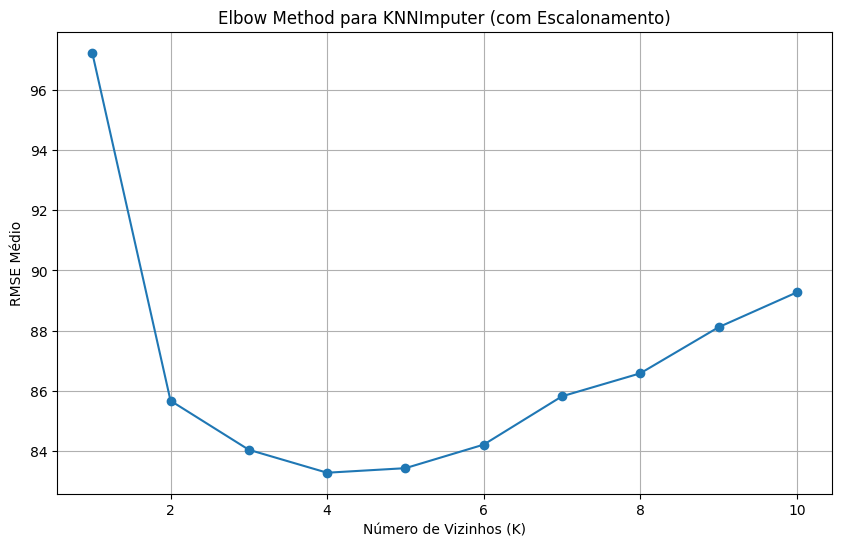

In [ ]:
# 📈 Criação do gráfico Elbow Method para visualizar o RMSE em função do número de vizinhos (K)

# 🔧 Define o tamanho da figura do gráfico
plt.figure(figsize=(10, 6))  # Largura=10, Altura=6

# 🪢 Plota os valores de RMSE médio para cada K:
# - k_values → eixo X (número de vizinhos)
# - rmse_values → eixo Y (erro médio quadrático para cada K)
# - marker='o' → adiciona bolinhas nos pontos para destacar
plt.plot(k_values, rmse_values, marker='o')

# 🎨 Título do gráfico
plt.title('Elbow Method para KNNImputer (com Escalonamento)')

# 🏷️ Nome dos eixos
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('RMSE Médio')

# 🗺️ Adiciona uma grade (linhas de referência no fundo do gráfico)
plt.grid(True)

plt.show()


In [ ]:
# 🔎 Encontrando o melhor valor de K baseado no menor RMSE

# np.argmin(rmse_values) retorna o índice do menor valor dentro da lista rmse_values
# k_values é uma sequência (range) com os valores testados de K
# Então, usamos esse índice para acessar o k correspondente no k_values

best_k = k_values[np.argmin(rmse_values)]  # Seleciona o K que teve o menor RMSE

# Exibe o resultado para o usuário
print(f"Melhor valor de K: {best_k}")


Melhor valor de K: 4


In [ ]:
# 🎯 Separando as variáveis numéricas e categóricas
# Seleciona apenas as colunas numéricas do dataframe
numericas = housing.select_dtypes(include=[np.number])

# Seleciona as colunas categóricas que você quer manter para depois juntar (ex: 'ocean_proximity')
categoricas = housing[['ocean_proximity']]  # Se houver mais variáveis categóricas, adiciona na lista

# 🔧 Separando os dados numéricos:
# 'numericas_cna' contém as linhas onde 'total_bedrooms' NÃO tem valores faltantes (completo)
numericas_cna = numericas.dropna(subset=['total_bedrooms'])

# 'numericas_na' contém as linhas onde 'total_bedrooms' está faltando (NaN)
numericas_na = numericas[numericas['total_bedrooms'].isna()]

# 🔗 Agora concatenamos as duas partes para montar o dataset completo de variáveis numéricas,
# onde as linhas com 'total_bedrooms' faltando vão estar no final
full_numericas = pd.concat([numericas_cna, numericas_na])

# 🔥 Escalonando as variáveis numéricas para que todas fiquem na mesma escala
# Isso evita que variáveis com valores muito maiores dominem o cálculo da distância no KNN
scaler = StandardScaler()
full_scaled = scaler.fit_transform(full_numericas)

# 🚀 Aplicando o KNNImputer com o número ótimo de vizinhos (K=4 no exemplo)
# O imputador vai preencher os valores faltantes baseando-se nos 4 vizinhos mais próximos
imputer = KNNImputer(n_neighbors=4)
imputed_data = imputer.fit_transform(full_scaled)

In [ ]:
# 🔙 Desfazendo o escalonamento
# imputed_data é um array numpy com os dados após imputação, mas ainda padronizados (z-score)
# scaler.scale_ é um array com o desvio padrão de cada coluna calculado no fit do StandardScaler
# scaler.mean_ é um array com a média de cada coluna calculada no fit do StandardScaler
# Para voltar aos valores originais (antes do escalonamento), aplicamos a fórmula inversa do z-score:
# valor_original = valor_padronizado * desvio_padrão + média
imputed_data = imputed_data * scaler.scale_ + scaler.mean_


# 🔧 Convertendo o resultado imputado (array NumPy) de volta para DataFrame pandas
# columns=full_numericas.columns -> mantemos os nomes originais das colunas
# index=full_numericas.index -> mantemos os índices originais (linhas)
# Isso é importante para manter o alinhamento e facilitar manipulações futuras
imputed_numericas = pd.DataFrame(imputed_data, columns=full_numericas.columns, index=full_numericas.index)


# ✅ Juntando as variáveis categóricas (não numéricas) que foram separadas antes
# pd.concat() concatena DataFrames pelo eixo das colunas (axis=1)
# Isso garante que todas as variáveis (numéricas + categóricas) estejam no mesmo DataFrame final
imputed_final = pd.concat([imputed_numericas, categoricas], axis=1)


# Executa uma análise para verificar se existem valores ausentes (NaN) no DataFrame final
# DataAnalyzer é uma classe customizada que tem um método analise_dados_nulos()
DataAnalyzer(imputed_final).analise_dados_nulos()

🔍 Análise de Dados Nulos:
--------------------------------------------------
                    Não Nulos  Nulos  Porcentagem Não Nulos (%)  Porcentagem Nulos (%)
longitude               20640      0                      100.0                    0.0
latitude                20640      0                      100.0                    0.0
housing_median_age      20640      0                      100.0                    0.0
total_rooms             20640      0                      100.0                    0.0
total_bedrooms          20640      0                      100.0                    0.0
population              20640      0                      100.0                    0.0
households              20640      0                      100.0                    0.0
median_income           20640      0                      100.0                    0.0
median_house_value      20640      0                      100.0                    0.0
ocean_proximity         20640      0                 

In [201]:
# 🏁 Dados finais prontos
housing_imputed = imputed_final.copy()

#### Comparar o desempenho do KNN-Imputer com os datasets NA, média e mediana

In [202]:
na_idx = housing['total_bedrooms'].isna()

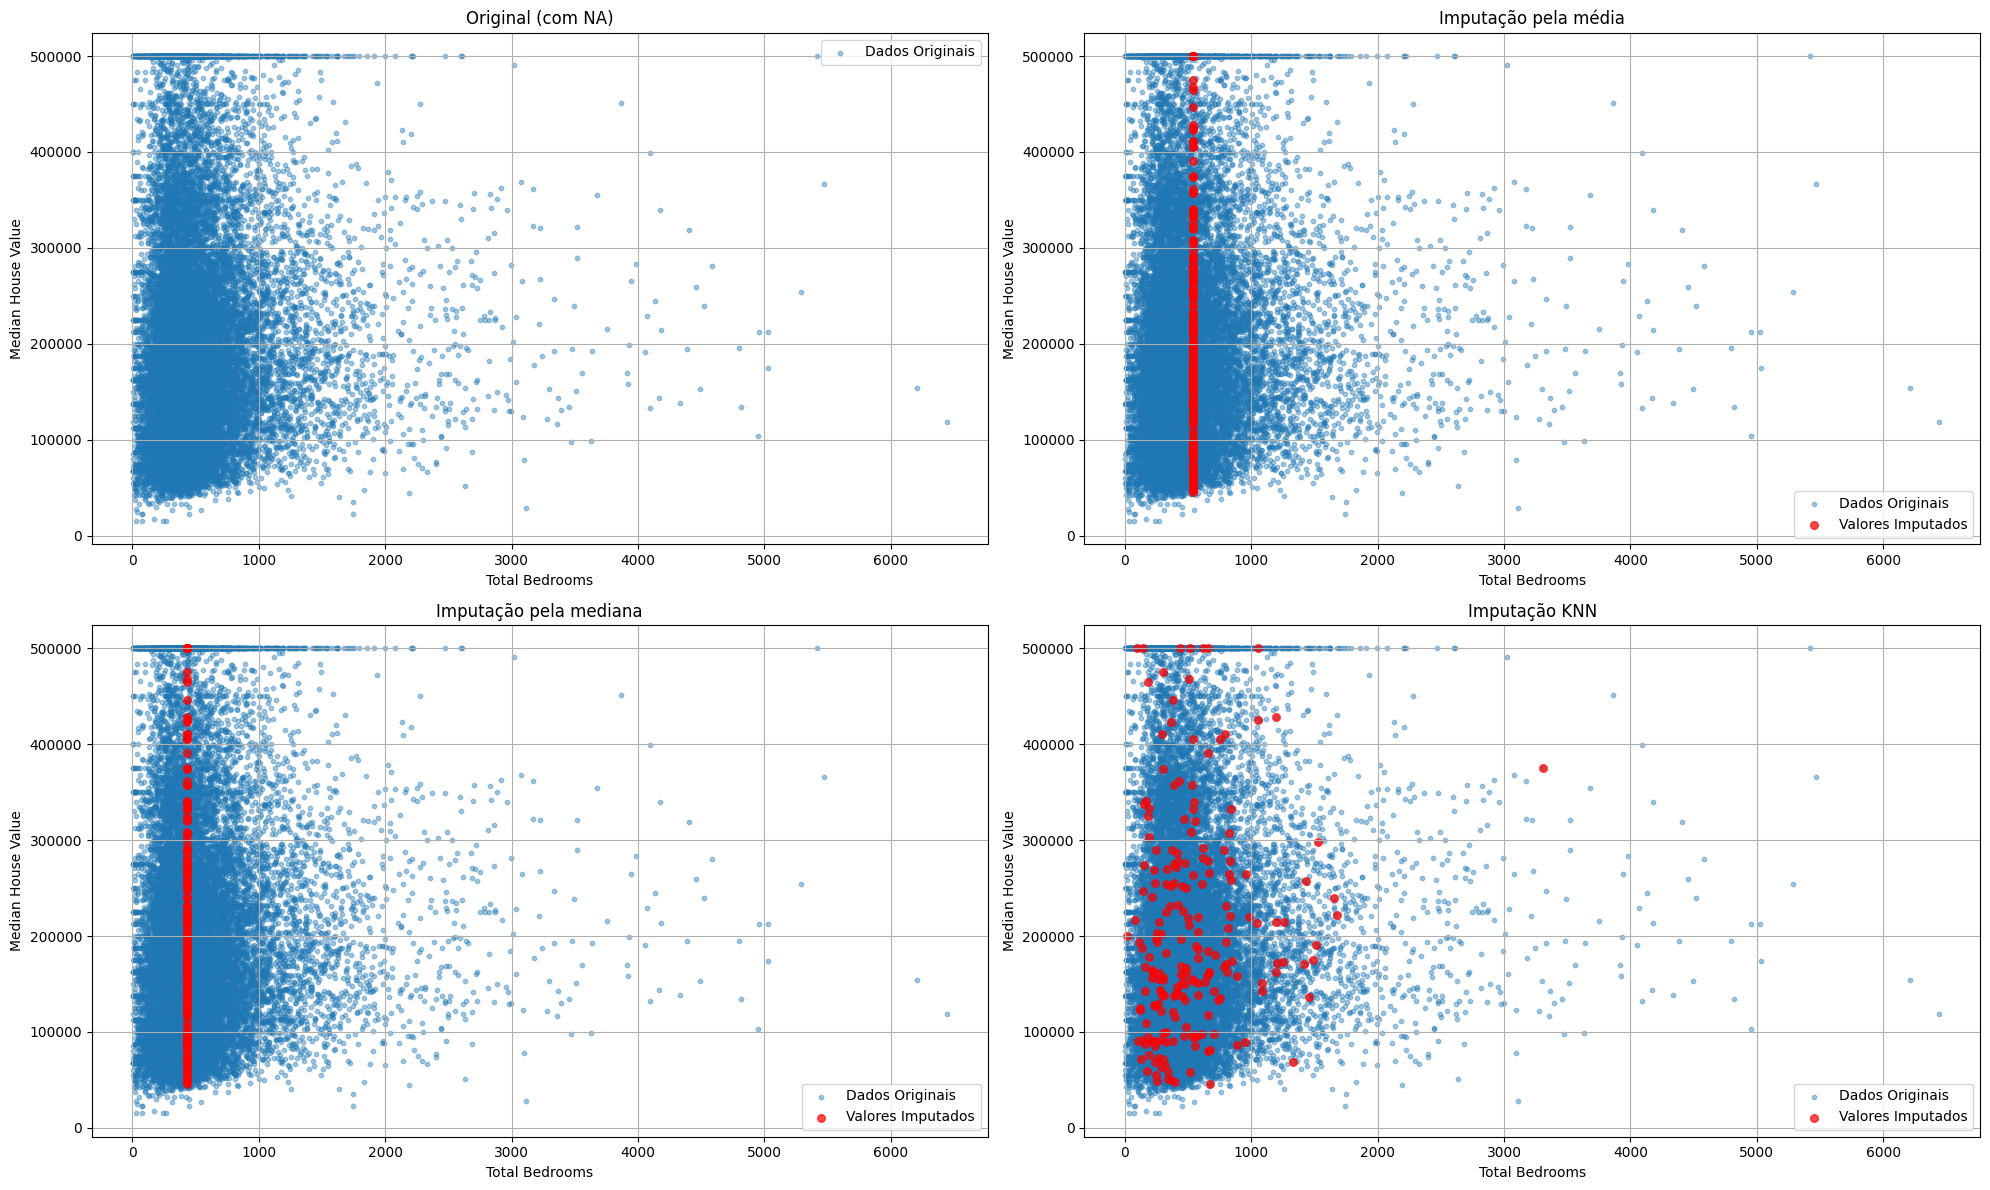

In [205]:
# Índices onde total_bedrooms era NA no dataset original
na_idx = housing['total_bedrooms'].isna()

# Datasets para plotar (com total_bedrooms e median_house_value)
datasets = {
    'Original (com NA)': housing[['total_bedrooms', 'median_house_value']],
    'Imputação pela média': housing_mean[['total_bedrooms', 'median_house_value']],
    'Imputação pela mediana': housing_median[['total_bedrooms', 'median_house_value']],
    'Imputação KNN': imputed_final[['total_bedrooms', 'median_house_value']],
}

plt.figure(figsize=(20, 12))

for i, (name, df) in enumerate(datasets.items(), start=1):
    plt.subplot(2, 2, i)
    
    # Plotar todos os pontos em azul claro
    plt.scatter(df['total_bedrooms'], df['median_house_value'], s=10, alpha=0.4, label='Dados Originais')
    
    # Se for um método que imputou, destacar os valores imputados
    if name in ['Imputação pela média', 'Imputação pela mediana', 'Imputação KNN']:
        # Pega os dados imputados (nas posições de NA no original)
        imputados_x = df.loc[na_idx, 'total_bedrooms']
        imputados_y = df.loc[na_idx, 'median_house_value']
        
        # Plota os pontos imputados em vermelho, maior e com transparência menor para destacar
        plt.scatter(imputados_x, imputados_y, color='red', s=30, alpha=0.7, label='Valores Imputados')
    
    plt.title(name)
    plt.xlabel('Total Bedrooms')
    plt.ylabel('Median House Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### **Transformadores de Dados**

Embora o Sklearn tenha muitos transformadores, nós precisamos escrever nossos prórpios transformadores para tarefas como operações de pré-processamento, como normalização, padronização, transformação de variáveis categóricas em variáveis numéricas, etc. Queremos que nosso transformador funcione perfeitamente com as funcionalidades do Sklearn, como Pipelines e GridSearchCV. Para isso, precisamos só precisamos criar uma classe e implementar os métodos ``fit()``, ``transform()`` e ``fit_transform()``. Para obter o último, basta acresentar ``TranformerMixin`` como uma classe. Além disso, se adicionar o ``BaseEstimator`` como uma classe, você terá acesso a todos os métodos de estimadores do Sklearn, como ``get_params()`` e ``set_params()``. Isso é útil para definir os hiperparâmetros do seu transformador.

Por exemplo, invés de desenvolver o código anterior do **KNNImputer** de forma manual, você pode usar o transformador do Sklearn para automatizar o processo e tornar ele reutilizável. O código abaixo mostra como fazer isso:

In [211]:
class CombinedAttributeOther(BaseEstimator, TransformerMixin):
    def __init__(self, target_col, k_candidates=range(1,11), cv=4):
        """
        Inicializa o imputador customizado.

        Parâmetros:
        -----------
        target_col : str
            Nome da coluna alvo que contém valores faltantes a serem imputados.
        k_candidates : iterable, default=range(1,11)
            Lista ou intervalo com os valores de 'k' vizinhos para testar no KNNImputer.
        cv : int, default=4
            Número de folds para validação cruzada na busca do melhor 'k'.
        """
        self.target_col = target_col
        self.k_candidates = list(k_candidates)
        self.cv = cv

    def fit(self, X, y=None):
        """
        Ajusta o imputador aos dados, encontrando o melhor valor de 'k' via validação cruzada,
        escalonando os dados e treinando o imputador final.

        Parâmetros:
        -----------
        X : pd.DataFrame
            Dataset completo contendo a coluna alvo e demais variáveis numéricas.
        y : Ignorado (compatibilidade com sklearn)

        Retorna:
        --------
        self : objeto ajustado
        """
        # Seleciona as colunas numéricas do dataset
        self.numeric_cols_ = X.select_dtypes(include=[np.number]).columns.tolist()

        # Verifica se a coluna alvo é numérica e está no dataset
        if self.target_col not in self.numeric_cols_:
            raise ValueError(f"Coluna alvo '{self.target_col}' deve ser numérica e estar no DataFrame")

        # Usa apenas as linhas onde a coluna alvo não está faltando para treinamento/validação
        train_data = X.dropna(subset=[self.target_col])
        
        # Separa features (numéricas, menos a target) e target
        X_train = train_data[self.numeric_cols_].drop(columns=[self.target_col])
        y_train = train_data[self.target_col]

        # Escalona os dados numéricos para melhorar desempenho do KNN
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)

        best_k = None
        best_score = np.inf  # Inicializa com infinito para buscar mínimo RMSE

        # Configura validação cruzada com embaralhamento para robustez
        kf = KFold(n_splits=self.cv, shuffle=True, random_state=42)

        # Para cada candidato a 'k', avalia o desempenho médio com CV
        for k in self.k_candidates:
            scores = []
            for train_idx, val_idx in kf.split(X_train_scaled):
                # Dados treino e validação do fold
                X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
                y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

                # Cria e treina o imputador KNN para o fold com k vizinhos
                imputer = KNNImputer(n_neighbors=k)
                X_tr_imputed = imputer.fit_transform(np.c_[X_tr, y_tr.values.reshape(-1,1)])

                # Imputa valores no conjunto de validação
                X_val_imputed = imputer.transform(np.c_[X_val, y_val.values.reshape(-1,1)])

                # Pega só a coluna alvo imputada
                y_val_pred = X_val_imputed[:, -1]

                # Calcula RMSE do fold (erro entre valor original e imputado)
                score = np.sqrt(np.mean((y_val.values - y_val_pred)**2))
                scores.append(score)

            # Média dos scores dos folds para este k
            mean_score = np.mean(scores)

            # Atualiza melhor k se melhor resultado
            if mean_score < best_score:
                best_score = mean_score
                best_k = k

        # Armazena o melhor k encontrado
        self.best_k_ = best_k

        # Salva o scaler (para uso na transformação)
        self.scaler_ = scaler

        # Cria imputador final com melhor k encontrado
        self.imputer_ = KNNImputer(n_neighbors=best_k)

        # Treina o imputador com o dataset completo, escalonado
        X_full = X[self.numeric_cols_].drop(columns=[self.target_col])
        y_full = X[self.target_col]
        X_scaled_full = scaler.transform(X_full)

        self.imputer_.fit(np.c_[X_scaled_full, y_full.values.reshape(-1,1)])

        return self

    def transform(self, X):
        """
        Aplica a imputação no dataset X fornecido, substituindo os valores faltantes
        da coluna alvo pelos valores imputados pelo KNNImputer treinado.

        Parâmetros:
        -----------
        X : pd.DataFrame
            Dataset para transformar/imputar.

        Retorna:
        --------
        X_new : pd.DataFrame
            Dataset com a coluna alvo imputada.
        """
        # Copia as colunas numéricas do dataset
        X_num = X[self.numeric_cols_].copy()

        # Escalona as colunas, exceto a coluna alvo
        X_num_scaled = self.scaler_.transform(X_num.drop(columns=[self.target_col]))

        # Realiza imputação concatenando as features com a coluna alvo (que pode ter NAs)
        imputed = self.imputer_.transform(np.c_[X_num_scaled, X_num[self.target_col].values.reshape(-1,1)])

        # Atualiza a coluna alvo com os valores imputados
        X_num[self.target_col] = imputed[:, -1]

        # Cria uma cópia do DataFrame original para não alterar inplace
        X_new = X.copy()

        # Atualiza as colunas numéricas com os valores (incluindo a coluna alvo imputada)
        X_new[self.numeric_cols_] = X_num

        return X_new

    def fit_transform(self, X, y=None):
        """
        Combina os passos fit e transform para facilitar uso.

        Parâmetros:
        -----------
        X : pd.DataFrame
            Dataset para ajustar e transformar.
        y : Ignorado (compatibilidade sklearn)

        Retorna:
        --------
        X_new : pd.DataFrame
            Dataset com coluna alvo imputada após ajuste.
        """
        return self.fit(X, y).transform(X)

Exemplo prático de aplicação:

In [212]:
# Suponha que a classe CombinedAttributeOther já foi definida/importada aqui

# Criando um DataFrame de exemplo com valores faltantes na coluna alvo 'target'
data = {
    'feature1': [1.0, 2.0, 3.0, 4.0, 5.0, np.nan, 7.0],
    'feature2': [10, 9, 8, 7, 6, 5, 4],
    'target': [100, 200, np.nan, 400, 500, 600, np.nan]
}

df = pd.DataFrame(data)

print("Dataset original:")
print(df)

Dataset original:
   feature1  feature2  target
0       1.0        10   100.0
1       2.0         9   200.0
2       3.0         8     NaN
3       4.0         7   400.0
4       5.0         6   500.0
5       NaN         5   600.0
6       7.0         4     NaN


In [213]:
# Instanciando o imputador para a coluna alvo 'target'
imputer = CombinedAttributeOther(target_col='target')

# 1. Usando fit(): ajusta o imputador nos dados
imputer.fit(df)

CombinedAttributeOther(k_candidates=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                       target_col='target')

In [216]:
# 2. Usando transform(): aplica a imputação (necessário já ter feito fit)
df_imputed = imputer.transform(df)

print("\nDataset após transform (imputação aplicada):")
print(df_imputed)


Dataset após transform (imputação aplicada):
   feature1  feature2  target
0       1.0        10   100.0
1       2.0         9   200.0
2       3.0         8   400.0
3       4.0         7   400.0
4       5.0         6   500.0
5       NaN         5   600.0
6       7.0         4   600.0


In [219]:
# Instanciando o imputador para a coluna alvo 'target'
imputer = CombinedAttributeOther(target_col='feature1')

# 3. Usando fit_transform(): faz o ajuste e já retorna o dataset imputado
df_imputed_2 = imputer.fit_transform(df)

print("\nDataset após fit_transform (ajuste + imputação):")
print(df_imputed_2)


Dataset após fit_transform (ajuste + imputação):
   feature1  feature2  target
0       1.0        10   100.0
1       2.0         9   200.0
2       3.0         8     NaN
3       4.0         7   400.0
4       5.0         6   500.0
5       7.0         5   600.0
6       7.0         4     NaN


In [222]:
imputer.best_k_

1

### ESCALONAMENTO DOS DADOS

O escalonamento de dados é uma etapa crucial no pré-processamento, especialmente quando se utiliza algoritmos baseados em distância, como o KNN. O escalonamento garante que todas as variáveis contribuam igualmente para a distância calculada, evitando que variáveis com escalas maiores dominem a análise. Para além do KNN, o escalonamento é importante para muitos algoritmos de aprendizado de máquina, como regressão logística, SVM e redes neurais. O escalonamento pode ser feito de várias maneiras, incluindo:
- **Min-Max Scaling:** Transforma os dados para um intervalo específico, geralmente [0, 1].
- **Padronização (Z-score):** Transforma os dados para que tenham média 0 e desvio padrão 1.
- **Robust Scaling:** Usa a mediana e o intervalo interquartil para escalonar os dados, tornando-o robusto a outliers.
- **Log Transformation:** Aplica a transformação logarítmica para lidar com distribuições assimétricas.
- **Quantile Transformation:** Transforma os dados para uma distribuição uniforme ou normal, útil para lidar com distribuições não gaussianas.
- **E entre outros...**

Entretanto, em Machine Learning, o escalonamento é uma etapa importante, mas não é sempre necessário. Por exemplo, algoritmos baseados em árvores (como Decision Trees e Random Forests) não são sensíveis à escala dos dados, então o escalonamento pode não ser necessário. No entanto, para algoritmos que dependem de distâncias, como KNN e SVM, o escalonamento é essencial para garantir um desempenho adequado. E mais, como em todas as etapas do pré-processamento, o escalonamento deve ser feito com cuidado, considerando o contexto dos dados e o algoritmo que será utilizado. O uso de técnicas de escalonamento pode melhorar a performance do modelo e garantir que todas as variáveis sejam tratadas de forma justa. Como em todas as transformações, é importante ajustar os escalonamentos apenas aos dados de treinamento, não ao conjunto de dados completo (incluindo o conjunto de testes). Só então, o escalonamento deve ser aplicado ao conjunto de teste usando os parâmetros calculados no conjunto de treinamento. Isso garante que o modelo seja avaliado de forma justa e evita vazamento de dados.

### Demonstração Matemática dos Métodos de Escalonamento

---

#### 1. Padronização (StandardScaler)

A padronização transforma os dados para que tenham média zero e desvio padrão 1, aplicando a fórmula:

$
x' = \dfrac{x - \mu}{\sigma}
$

onde:

- $x$ é o valor original da amostra,
- $\mu$ é a média dos dados do conjunto (geralmente calculada no conjunto de treinamento),
- $\sigma$ é o desvio padrão dos dados do conjunto.

---

#### 2. MinMaxScaler

O MinMaxScaler reescala os dados para um intervalo específico $[a, b]$. A fórmula geral é:

$
x' = a + \dfrac{(x - x_{\min})(b - a)}{x_{\max} - x_{\min}}
$

onde:

- $x$ é o valor original da amostra,
- $x_{\min}$ e $x_{\max}$ são, respectivamente, o valor mínimo e máximo dos dados do conjunto,
- $a$ e $b$ são os limites inferior e superior do intervalo desejado.

---

##### Caso 1: MinMaxScaler para o intervalo $[0, 1]$

Aqui, $a = 0$ e $b = 1$, então a fórmula simplifica para:

$
x' = \dfrac{x - x_{\min}}{x_{\max} - x_{\min}}
$

---

##### Caso 2: MinMaxScaler para o intervalo $[1, 1]$

Note que $[1, 1]$ é um intervalo degenerado, ou seja, os limites inferior e superior são iguais. Nesse caso, a fórmula se torna:

$
x' = 1 + \dfrac{(x - x_{\min})(1 - 1)}{x_{\max} - x_{\min}} = 1 + 0 = 1
$

Ou seja, **todos os valores são mapeados para 1**, já que não há variação no intervalo.

---

# Resumo

| Técnica         | Fórmula                                               | Intervalo padrão         |
|-----------------|------------------------------------------------------|-------------------------|
| Padronização    | $x' = \dfrac{x - \mu}{\sigma}$                      | Média 0, desvio padrão 1 |
| MinMaxScaler    | $x' = a + \dfrac{(x - x_{\min})(b - a)}{x_{\max} - x_{\min}}$ | Variável, ex: [0, 1]    |
| MinMaxScaler [0,1] | $x' = \dfrac{x - x_{\min}}{x_{\max} - x_{\min}}$ | [0, 1]                  |
| MinMaxScaler [1,1] | $x' = 1$                                          | Degenerado, tudo igual 1 |

Exemplo abaixo:

In [ ]:
# 🎲 Define uma semente (seed) para o gerador de números aleatórios
# Isso garante que os resultados sejam reproduzíveis, ou seja, 
# toda vez que rodar o código, os números gerados serão os mesmos
np.random.seed(42)

# 🎯 Cria um conjunto de dados aleatórios seguindo uma distribuição normal (Gaussiana)

data = np.random.normal(
    loc=20,      # 👉 loc é a MÉDIA da distribuição (nesse caso, 20)
    scale=5,     # 👉 scale é o DESVIO PADRÃO (a dispersão dos dados, aqui é 5)
    size=1000    # 👉 size define a quantidade de valores que serão gerados (1000 valores)
).reshape(-1, 1) # 👉 reshape(-1, 1) transforma o array de uma dimensão (1D) 
                 # em um array bidimensional (2D) com 1000 linhas e 1 coluna.
                 # Isso é útil para compatibilidade com modelos e funções 
                 # do scikit-learn, que geralmente trabalham com matrizes (2D).

# 🔍 Resultado:
# 'data' é um array de forma (1000, 1) contendo 1000 valores simulados
# que seguem uma distribuição normal com média 20 e desvio padrão 5.

In [ ]:
# 1️⃣ Padronização padrão com StandardScaler (média = 0, variância = 1)

# 🔧 Cria um objeto do StandardScaler
# Esse scaler transforma os dados para que tenham:
# → média = 0
# → desvio padrão = 1 (variância = 1)
scaler_standard = StandardScaler()

# 🚀 Ajusta o scaler aos dados (fit) e transforma (transform) de uma vez
# → Calcula a média e o desvio padrão dos dados
# → Retorna um array padronizado: (x - média) / desvio_padrão
data_standard = scaler_standard.fit_transform(data)


# 2️⃣ Padronização customizada: média = 5, variância = 2

# 👉 Aqui pegamos os dados já padronizados (média = 0, desvio = 1)
# e fazemos uma transformação linear para alterar a escala:

# Multiplicamos pelos novo desvio padrão:
# → Desvio padrão = √2, pois variância = 2 (variância = desvio²)
# E somamos a nova média = 5
data_standard_custom = data_standard * np.sqrt(2) + 5

In [ ]:
# 🔧 Cria um objeto MinMaxScaler com intervalo padrão (0, 1)
scaler_minmax = MinMaxScaler(feature_range=(0, 1))

# 🚀 Ajusta (fit) e transforma (transform) os dados
# → Escala os dados para que todos fiquem no intervalo de 0 a 1
data_minmax = scaler_minmax.fit_transform(data)

# 🔧 Cria um MinMaxScaler que ajusta os dados para o intervalo (0, 10)
scaler_minmax_custom = MinMaxScaler(feature_range=(0, 10))

# 🚀 Ajusta e transforma os dados para esse novo intervalo
data_minmax_custom = scaler_minmax_custom.fit_transform(data)

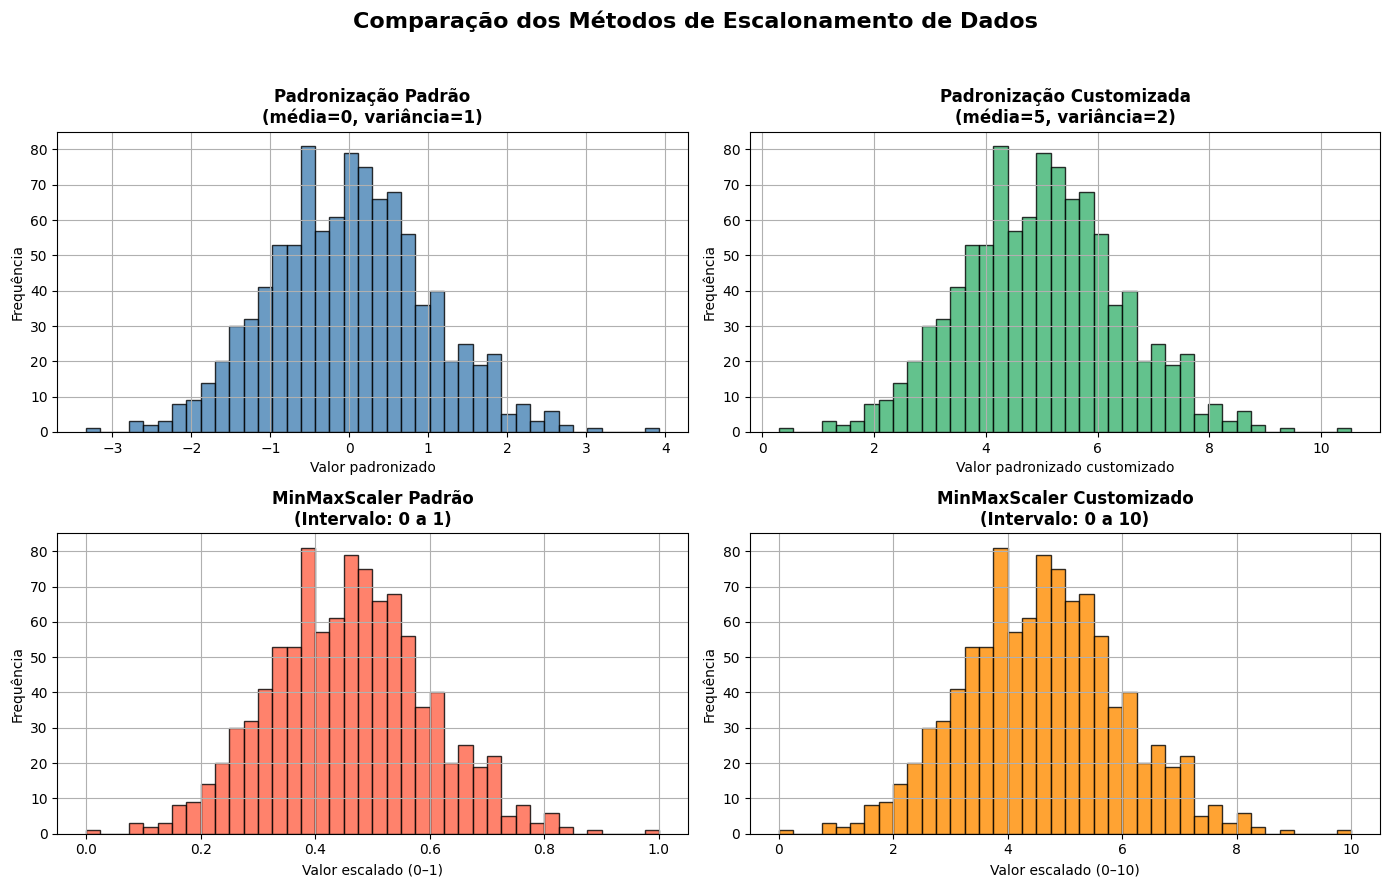

In [232]:
# Cria figura com 2 linhas x 2 colunas de subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 9))                    # figsize define o tamanho em polegadas
fig.suptitle('Comparação dos Métodos de Escalonamento de Dados', fontsize=16, weight='bold')

# Subplot 1: histograma da padronização padrão
axs[0, 0].hist(data_standard, bins=40,                           # Número de barras no histograma
               color='steelblue', edgecolor='black', alpha=0.8)  # Cores e transparência
axs[0, 0].set_title('Padronização Padrão\n(média=0, variância=1)', fontsize=12, weight='bold')
axs[0, 0].set_xlabel('Valor padronizado')                        # Label do eixo X
axs[0, 0].set_ylabel('Frequência')                               # Label do eixo Y
axs[0, 0].grid(True)                                             # Ativa grade

# Subplot 2: histograma da padronização customizada
axs[0, 1].hist(data_standard_custom, bins=40,
               color='mediumseagreen', edgecolor='black', alpha=0.8)
axs[0, 1].set_title('Padronização Customizada\n(média=5, variância=2)', fontsize=12, weight='bold')
axs[0, 1].set_xlabel('Valor padronizado customizado')
axs[0, 1].set_ylabel('Frequência')
axs[0, 1].grid(True)

# Subplot 3: histograma do MinMaxScaler padrão (0 a 1)
axs[1, 0].hist(data_minmax, bins=40,
               color='tomato', edgecolor='black', alpha=0.8)
axs[1, 0].set_title('MinMaxScaler Padrão\n(Intervalo: 0 a 1)', fontsize=12, weight='bold')
axs[1, 0].set_xlabel('Valor escalado (0–1)')
axs[1, 0].set_ylabel('Frequência')
axs[1, 0].grid(True)

# Subplot 4: histograma do MinMaxScaler customizado (0 a 10)
axs[1, 1].hist(data_minmax_custom, bins=40,
               color='darkorange', edgecolor='black', alpha=0.8)
axs[1, 1].set_title('MinMaxScaler Customizado\n(Intervalo: 0 a 10)', fontsize=12, weight='bold')
axs[1, 1].set_xlabel('Valor escalado (0–10)')
axs[1, 1].set_ylabel('Frequência')
axs[1, 1].grid(True)

# Ajusta layout para evitar sobreposição de elementos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **Feature Engeneering**

Como diz o ditado: entra lixo, sai lixo. Seu sistema de só será capaz de aprender se os dados de treinamento tiverem características relevantes o suficientes e poucas características irrelevantes. Uma parte imprescindível do sucesso de um projeto de ML é criar um bom conjunto de características para o treinamento, processo chamado de *feature engeneering* (ou engenharia de features) que envolve os seguintes passos:

- *Seleção de características* (selecionar as características mais úteis para treinamento entre as características existentes)
- *Extração de características* (combinar características existentes a fim de obter as mais úteis)
- Criação de novas características ao coletar dados novos.

Até o momento, lidamos apenas com atributos numéricos, mas agora analisaremos os atributosde texto. Neste conjunto de dados, existe somente uma variável: o atributo ``ocean_proximity``, vamos analisar ele:

In [239]:
# 📊 Calcula as porcentagens de cada categoria na coluna 'ocean_proximity'
ocean_proximity_percent = round((housing_imputed.ocean_proximity.value_counts() / len(housing_imputed)) * 100, 2)

# Cria dataframe
df_percent = pd.DataFrame({
    'Localização': ocean_proximity_percent.index,
    'Porcentagem (%)': ocean_proximity_percent.values
})

# 📜 Gera a string em formato Markdown para exibir como tabela
markdown_table = "### Distribuição das Localizações (`ocean_proximity`)\n\n"
markdown_table += df_percent.to_markdown(index=False)

# 🔥 Exibe como markdown
display(Markdown(markdown_table))


### Distribuição das Localizações (`ocean_proximity`)

| Localização   |   Porcentagem (%) |
|:--------------|------------------:|
| <1H OCEAN     |             44.26 |
| INLAND        |             31.74 |
| NEAR OCEAN    |             12.88 |
| NEAR BAY      |             11.09 |
| ISLAND        |              0.02 |

### One Hot Encoder

A maioria dos algoritmos de ML prefere trabalhar com números, para corrigir esse problema, uma solução comum é criar um atributo binário por categoria, isso se chama *codificação one-hot* [*one-hot enconding* ou ainda *codificação distribuída*], porque apenas um atributo será igual a 1, enquanto os outros serão 0. Os atributos novos se chamam atributos falsos [*dummy*]. ``sklearn`` fornece uma uma classe ``OneHotEncoder()`` para converter valores categóricos em valores one-hot:

In [240]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_imputed[['ocean_proximity']])
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [241]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

### Combinações de Atributos

Uma das últimas que você pode querer fazer antes de preparar os dados para os algoritmos de ML é testar diferentes combinações de atributos para gerar novos atributos. Por exemplo:
- O número total de cômodos em uma determinada região não servirá de nadda se não souber quantas famílias vivem nessa região.
- Do mesmo modo, o número total de quartos propriamente dito não ajuda muito: você provavelmente vai querer comprá-lo com o número de cômodos.
- E ao que tudo indica, a população por domicílio também é uma combinação de taributos interressante:

In [ ]:
# 📌 Feature Engineering: criação de novas variáveis

# 🔧 rooms_per_household -> número médio de quartos por domicílio
housing_imputed['rooms_per_household'] = housing_imputed['total_rooms'] / housing_imputed['households']

# 🔧 bedrooms_per_room -> proporção de quartos que são dormitórios (mede a densidade de dormitórios)
housing_imputed['bedrooms_per_room'] = housing_imputed['total_bedrooms'] / housing_imputed['total_rooms']

# 🔧 population_for_household -> número médio de pessoas por domicílio
housing_imputed['population_for_household'] = housing_imputed['population'] / housing_imputed['households']

In [243]:
# 🔧 Seleciona apenas as novas variáveis criadas
df_new_features = housing_imputed[['rooms_per_household', 'bedrooms_per_room', 'population_for_household']].head()

# 📜 Cria a string da tabela em Markdown
markdown_table = "### 🔍 Novas Variáveis Criadas (`Feature Engineering`)\n\n"
markdown_table += df_new_features.to_markdown(index=False)

# 📊 Exibe como Markdown no output
display(Markdown(markdown_table))


### 🔍 Novas Variáveis Criadas (`Feature Engineering`)

|   rooms_per_household |   bedrooms_per_room |   population_for_household |
|----------------------:|--------------------:|---------------------------:|
|               6.98413 |            0.146591 |                    2.55556 |
|               6.23814 |            0.155797 |                    2.10984 |
|               8.28814 |            0.129516 |                    2.80226 |
|               5.81735 |            0.184458 |                    2.54795 |
|               6.28185 |            0.172096 |                    2.18147 |

In [246]:
len(housing_imputed.columns)

13

### Seleção de Variáveis

#### Visualizando Dados Geográficos

Uma vez que temos informações geográficas (latitude e longutude), é uma boa ideia criar um diagrama de dispersão para visualizar os dados de todas as regiões:

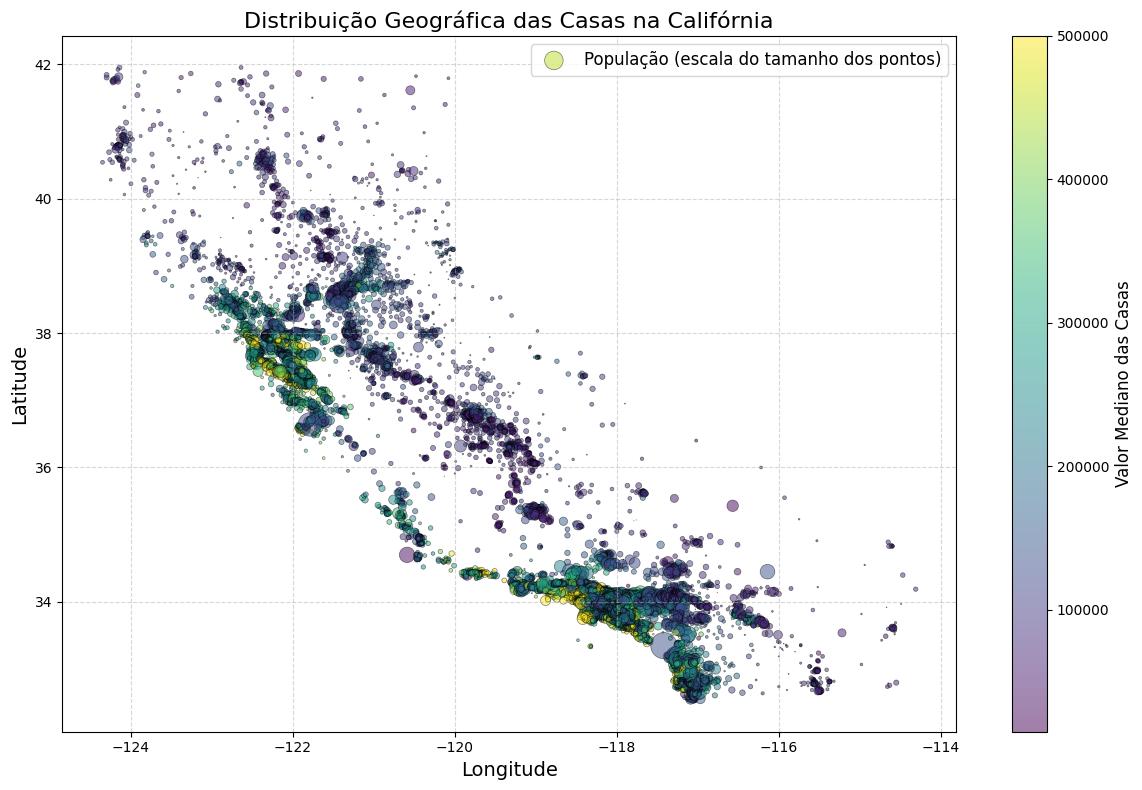

In [248]:
# Plotagem de um gráfico de dispersão (scatter plot) usando DataFrame 'housing_imputed'
# Esse gráfico representa as casas de acordo com sua longitude e latitude, com várias codificações visuais.

plt.figure(figsize=(12, 8))  # Define o tamanho da figura em polegadas (mais espaço, melhor visualização)

scatter = plt.scatter(
    housing_imputed['longitude'],             # Eixo x: longitude das casas
    housing_imputed['latitude'],              # Eixo y: latitude das casas
    alpha=0.5,                                # Transparência dos pontos, de 0 (invisível) a 1 (opaco)
    s=housing_imputed['population'] / 100,    # Tamanho dos pontos proporcional à população local
    c=housing_imputed['median_house_value'],  # Cor dos pontos de acordo com o valor mediano das casas
    cmap='viridis',                           # Mapa de cores mais moderno e perceptível (substituindo 'jet')
    edgecolor='k',                            # Adiciona contorno preto aos pontos
    linewidth=0.5                             # Define a espessura da linha do contorno
)

plt.xlabel('Longitude', fontsize=14)          # Rótulo do eixo x com tamanho de fonte maior
plt.ylabel('Latitude', fontsize=14)           # Rótulo do eixo y

plt.title('Distribuição Geográfica das Casas na Califórnia', fontsize=16)  # Título do gráfico

cbar = plt.colorbar(scatter)                  # Adiciona barra de cores ao lado
cbar.set_label('Valor Mediano das Casas', fontsize=12)  # Rótulo da barra de cores

plt.legend(['População (escala do tamanho dos pontos)'], fontsize=12)  # Legenda explicando o tamanho

plt.grid(True, linestyle='--', alpha=0.5)     # Adiciona grade com linhas tracejadas e leve transparência

plt.tight_layout()                            # Ajusta automaticamente o layout para não cortar elementos

plt.show()                                    # Exibe o gráfico


O raio de cada círculo representa a população (opção ``s``) e a cor representa o preço (opção ``c``). Usamos um mapa de cores predefinido (opção ``cmap``) chamado ``virids``, que varia de roxo (valores baixos) para amarelo (valores altos). Esta imagem informa que os preços dos imóveis estão muito relacionados à localização (por exemplo proximidade do mar) e à densidade populacional.

#### Buscando **Correlações**

##### Correlação de Pearson

A correlação de Pearson é frequentemente aplicada de forma direta em análises exploratórias, como visto no livro de Aurélien Géron (*Hands-On Machine Learning*), devido à sua simplicidade e utilidade para rapidamente identificar padrões de dependência linear entre variáveis.

No entanto, é importante destacar que, para uma interpretação estatística rigorosa e inferencial da correlação, recomenda-se verificar os seguintes pressupostos: linearidade, normalidade, homocedasticidade, escala intervalar e ausência de outliers.

1️⃣ O objetivo final é predição, não inferência causal.

Logo, o foco não é fazer testes estatísticos para validar hipóteses ou explicar relações entre variáveis com validade inferencial, mas **melhorar a acurácia ou outra métrica do modelo preditivo**.

➡️ Nestes casos, **NÃO é necessário exigir os pressupostos clássicos da correlação de Pearson**, como linearidade ou normalidade.

➡️ A correlação pode ser usada como uma **heurística rápida** para identificar redundâncias ou dependências fortes, e guiar a escolha de features.

##### 🧠 **Lógica da Correlação de Pearson**

A correlação de Pearson mede o grau de **associação linear** entre duas variáveis numéricas.

A fórmula é:

$
r = \dfrac{\sum (X_i - \bar{X}) (Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2} \cdot \sqrt{\sum (Y_i - \bar{Y})^2}}
$

Onde:

- $X_i$ e $Y_i$ são os valores das variáveis X e Y.
- $\bar{X}$ e $\bar{Y}$ são as médias de X e Y.
- $r$ é o coeficiente de correlação de Pearson, que varia entre -1 e 1.

**Interpretação:**

- $r = 1$: Correlação linear positiva perfeita.
- $r = -1$: Correlação linear negativa perfeita.
- $r = 0$: Ausência de correlação linear (mas não implica independência total).

Ele é, basicamente, a **covariância padronizada** entre duas variáveis. A padronização ocorre ao dividir pela multiplicação dos desvios padrão, permitindo que o coeficiente sempre esteja na escala de -1 a 1.

---

##### Correlação de Spearman

A correlação de Spearman é uma medida não-paramétrica que avalia a **força e a direção da associação monotônica** entre duas variáveis, isto é, verifica se à medida que uma variável aumenta, a outra tende a aumentar ou diminuir, sem exigir que essa relação seja linear.

É especialmente útil quando:

- Os dados não seguem uma distribuição normal.
- Há presença de outliers.
- As relações são não-lineares, mas ainda monotônicas.

##### 🧠 **Lógica da Correlação de Spearman**

O primeiro passo é transformar os dados em **ranks** (ordens). Cada valor de X e Y é substituído por sua posição na ordenação dos dados.

A fórmula da correlação de Spearman, quando não há empates, é:

$
r_s = 1 - \dfrac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
$

Onde:

- $d_i$ = diferença entre os ranks de cada par de observações $(X_i, Y_i)$.
- $n$ = número de observações.
- $r_s$ = coeficiente de correlação de Spearman.

Se houver empates nos dados, usa-se a mesma lógica da correlação de Pearson, mas aplicada aos ranks em vez dos valores originais.

**Interpretação:**

- $r_s = 1$: Relação monotônica crescente perfeita.
- $r_s = -1$: Relação monotônica decrescente perfeita.
- $r_s = 0$: Ausência de relação monotônica.

➡️ Assim como a correlação de Pearson mede associações lineares, a de Spearman amplia essa análise para relações monotônicas, oferecendo maior robustez em cenários mais realistas do mundo dos dados.

---

In [307]:
from correlation_analyzer import CorrelationAnalyzer

In [308]:
analyser = CorrelationAnalyzer(housing_imputed)

In [309]:
analyser.correlation(target_col='median_house_value', method='pearson', sort=True, ascending=False)

### Correlações com `median_house_value` (método: `pearson`)

|                          |   correlation_with_median_house_value |
|--------------------------|---------------------------------------|
| median_income            |                                 0.688 |
| rooms_per_household      |                                 0.152 |
| total_rooms              |                                 0.134 |
| housing_median_age       |                                 0.106 |
| households               |                                 0.066 |
| total_bedrooms           |                                 0.050 |
| population_for_household |                                -0.024 |
| population               |                                -0.025 |
| longitude                |                                -0.046 |
| latitude                 |                                -0.144 |
| bedrooms_per_room        |                                -0.257 |

,correlation_with_median_house_value
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.050419
population_for_household,-0.023737
population,-0.024650
longitude,-0.045967
latitude,-0.144160


In [310]:
analyser.correlation(target_col='median_house_value', method='spearman', sort=True, ascending=False)

### Correlações com `median_house_value` (método: `spearman`)

|                          |   correlation_with_median_house_value |
|--------------------------|---------------------------------------|
| median_income            |                                 0.677 |
| rooms_per_household      |                                 0.263 |
| total_rooms              |                                 0.206 |
| households               |                                 0.113 |
| total_bedrooms           |                                 0.087 |
| housing_median_age       |                                 0.075 |
| population               |                                 0.004 |
| longitude                |                                -0.070 |
| latitude                 |                                -0.166 |
| population_for_household |                                -0.257 |
| bedrooms_per_room        |                                -0.332 |

,correlation_with_median_house_value
median_income,0.676778
rooms_per_household,0.263366
total_rooms,0.205952
households,0.112737
total_bedrooms,0.087183
housing_median_age,0.074855
population,0.003839
longitude,-0.069667
latitude,-0.165739
population_for_household,-0.256593


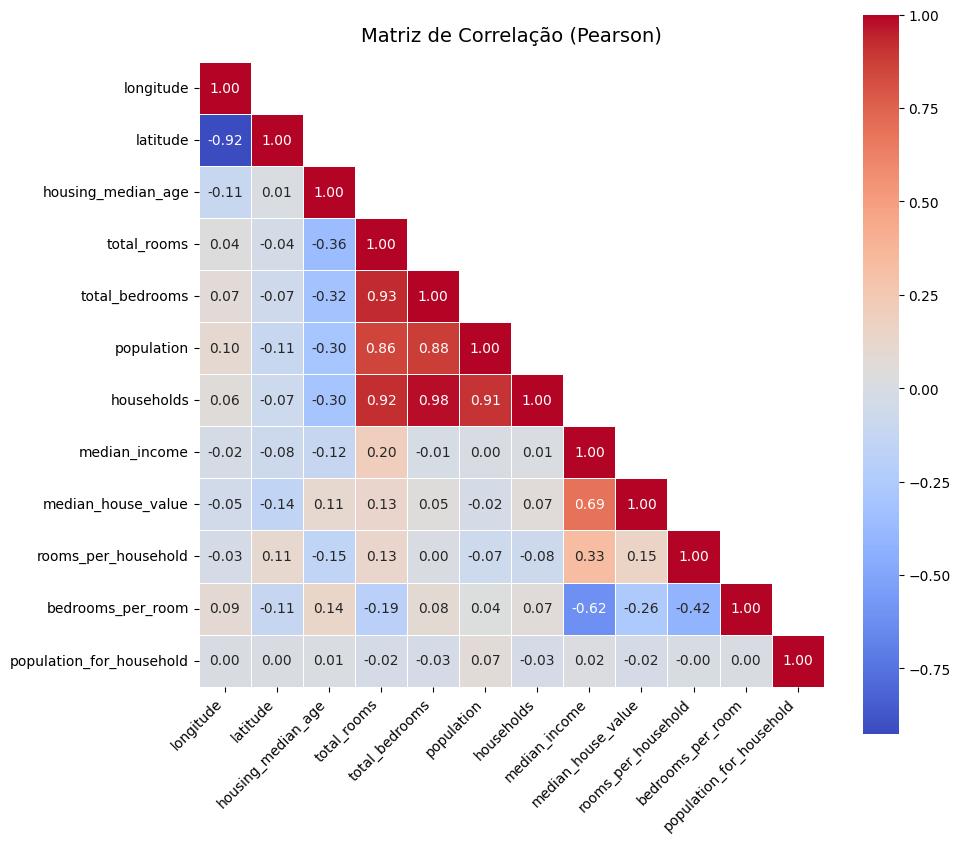

<Axes: title={'center': 'Matriz de Correlação (Pearson)'}>

In [311]:
analyser.plot_correlation_matrix(figsize= (10, 10), method='pearson')

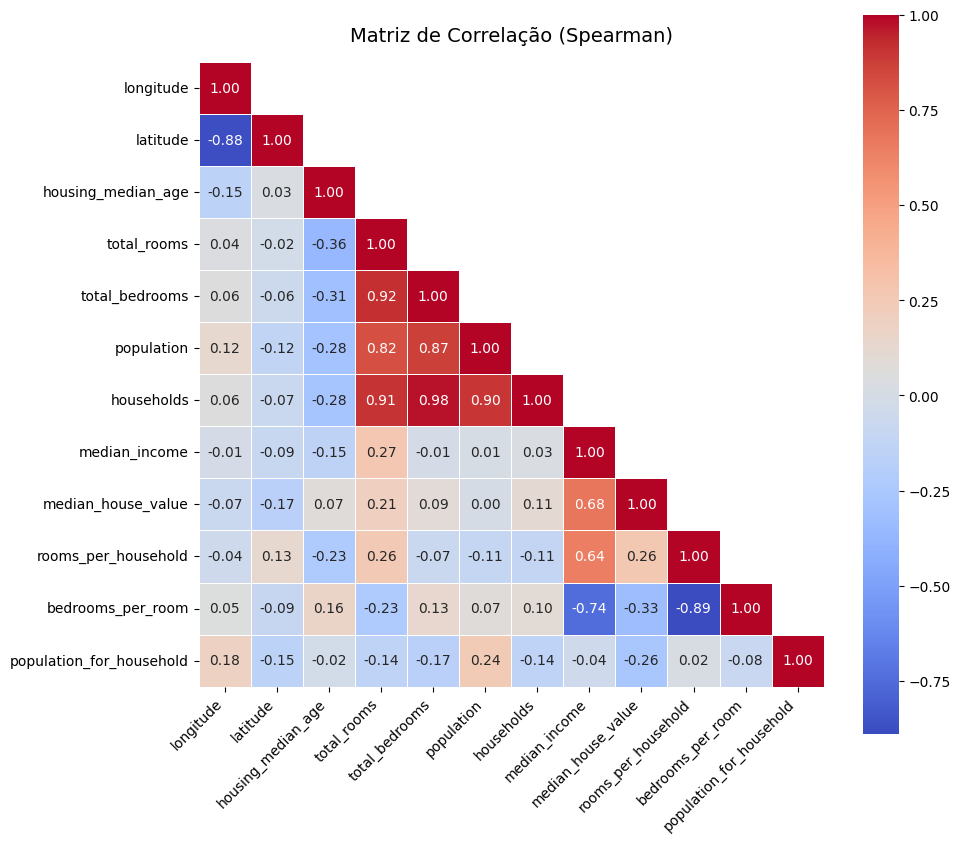

<Axes: title={'center': 'Matriz de Correlação (Spearman)'}>

In [312]:
analyser.plot_correlation_matrix(figsize= (10, 10), method='spearman')

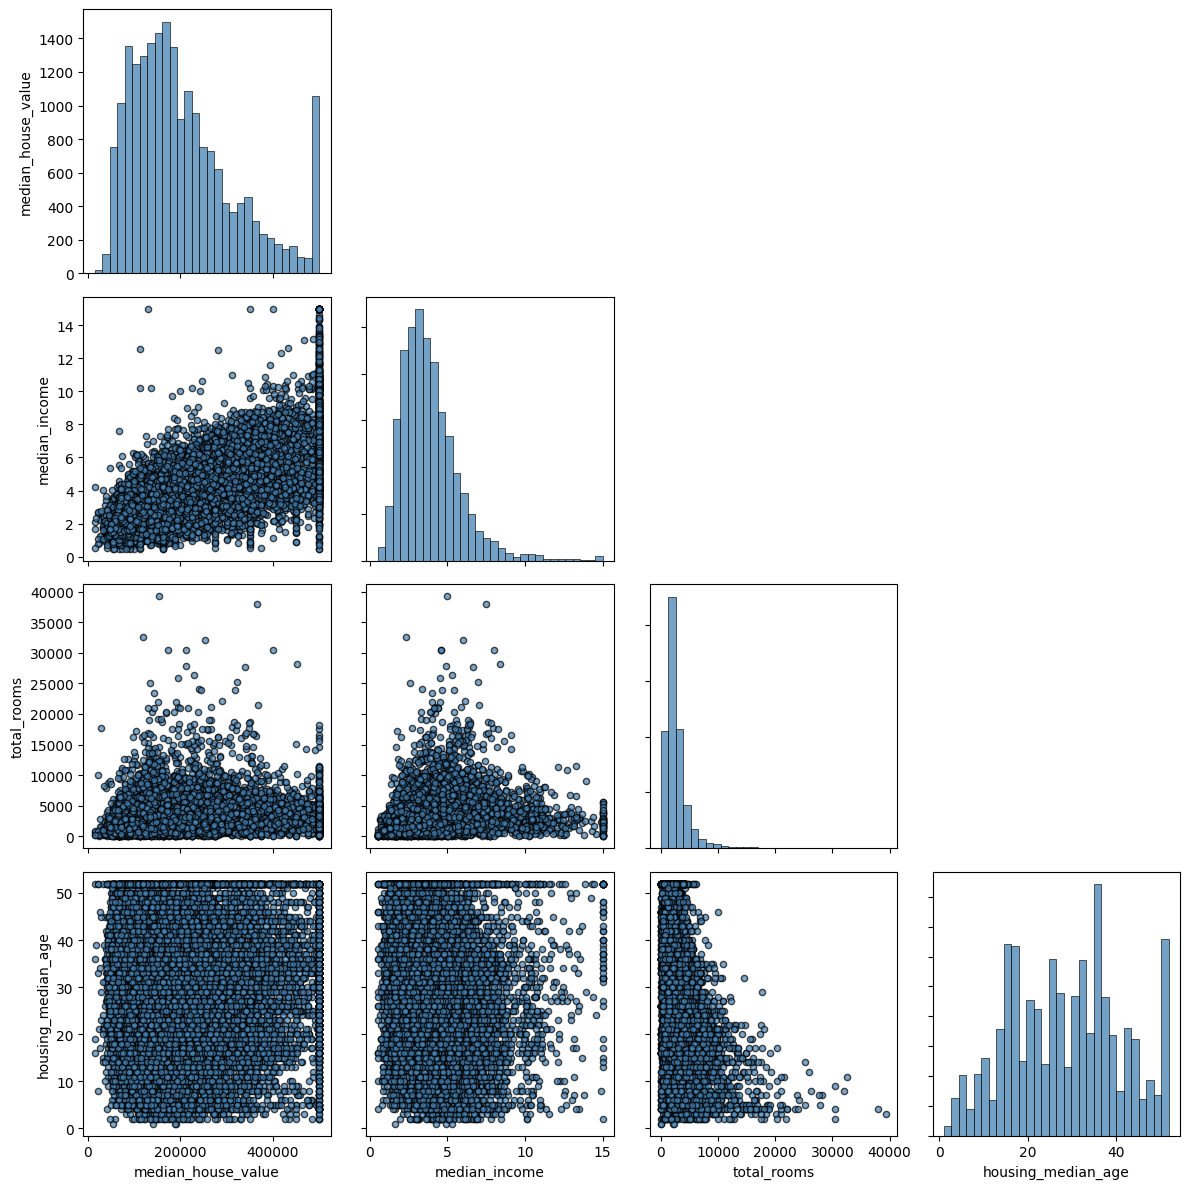

In [313]:
analyser.plot_scatter_matrix(figsize=(12, 12), variables=['median_house_value', 'median_income', 'total_rooms',
                                                    'housing_median_age'])

## **Criando o Conjunto de Treinamento e Teste**

Pode parecer estranho separar voluntariamente uma parte dos dados neste estágio. Afinal, você apenas deu uma olhada rápida nos dados, e certamente deveria aprender muito mais sobre eles antes de decidir quais algoritmos utilizar, certo? Isso é verdade, mas seu cérebro é um sistema incrível de detecção de padrões, o que também significa que ele é altamente propenso ao **overfitting**: se você olhar para o conjunto de teste, pode acabar encontrando algum padrão aparentemente interessante nos dados de teste que o leva a escolher um tipo específico de modelo de machine learning.

Quando você estima o erro de generalização usando o conjunto de teste, essa estimativa será **otimista demais**, e você pode acabar lançando um sistema que não terá um desempenho tão bom quanto o esperado. Isso é conhecido como **data snooping bias** (viés de bisbilhotagem dos dados).

A criação de um conjunto de teste é, teoricamente, simples: selecione algumas instâncias aleatoriamente — tipicamente **20% do conjunto de dados** (ou menos, se seu dataset for muito grande) — e separe-as.

In [316]:
def split_train_test(data, test_ratio):
    """
    Divide os dados em conjuntos de treinamento e teste de forma aleatória.

    -------------------------------
    🔧 Parâmetros:
    - data: DataFrame contendo os dados que serão divididos.
      ➡️ É o dataset completo que você deseja particionar.

    - test_ratio: float
      ➡️ Proporção dos dados que serão separados para o conjunto de teste.
      ➡️ Exemplo: se test_ratio = 0.2, então 20% dos dados serão usados para teste,
         e 80% para treino.

    -------------------------------
    🔙 Retorna:
    - train_data: DataFrame com os dados de treinamento.
    - test_data: DataFrame com os dados de teste.

    -------------------------------
    🧠 Lógica do algoritmo:

    1️⃣ Cria uma sequência de índices embaralhados dos dados.
    2️⃣ Calcula o tamanho do conjunto de teste com base no test_ratio.
    3️⃣ Separa os índices do conjunto de teste e do conjunto de treino.
    4️⃣ Retorna os subconjuntos correspondentes de treino e teste.
    """

    # Gera uma permutação aleatória dos índices do DataFrame.
    # Isso garante que a divisão seja aleatória a cada execução.
    shuffled_indices = np.random.permutation(len(data))

    # Calcula o número de amostras que irão compor o conjunto de teste.
    test_set_size = int(len(data) * test_ratio)

    # Seleciona os primeiros 'test_set_size' índices para o conjunto de teste.
    test_indices = shuffled_indices[:test_set_size]

    # O restante dos índices será usado para o conjunto de treinamento.
    train_indices = shuffled_indices[test_set_size:]

    # Retorna os subconjuntos de treino e teste, utilizando os índices gerados.
    return data.iloc[train_indices], data.iloc[test_indices]


Podemos usar uma função como essa:

In [319]:
train_set, test_set = split_train_test(housing_imputed, test_ratio=0.2)

In [320]:
display(Markdown(f"""
### 🔍 Conjunto de Treinamento (`train_set`)

{train_set.head().to_markdown(index=False)}

### 🔍 Conjunto de Teste (`test_set`)

{test_set.head().to_markdown(index=False)}
"""))


### 🔍 Conjunto de Treinamento (`train_set`)

|   longitude |   latitude |   housing_median_age |   total_rooms |   total_bedrooms |   population |   households |   median_income |   median_house_value | ocean_proximity   |   rooms_per_household |   bedrooms_per_room |   population_for_household |
|------------:|-----------:|---------------------:|--------------:|-----------------:|-------------:|-------------:|----------------:|---------------------:|:------------------|----------------------:|--------------------:|---------------------------:|
|     -122.14 |      37.43 |                   18 |          2060 |              563 |         1144 |          600 |          4.0686 |               378600 | NEAR BAY          |               3.43333 |            0.273301 |                    1.90667 |
|     -122.28 |      38.34 |                   44 |          1066 |              190 |          416 |          174 |          3.6389 |               304000 | NEAR BAY          |               6.12644 |            0.178236 |                    2.3908  |
|     -120.42 |      34.95 |                   33 |          3404 |              711 |         1579 |          639 |          3.1078 |               146700 | <1H OCEAN         |               5.32707 |            0.208872 |                    2.47105 |
|     -120.57 |      38.2  |                   13 |          4110 |              847 |         1796 |          706 |          2.6417 |               122300 | INLAND            |               5.82153 |            0.206083 |                    2.54391 |
|     -118.44 |      34.28 |                   32 |           527 |              146 |          582 |          143 |          1.7708 |               138800 | <1H OCEAN         |               3.68531 |            0.27704  |                    4.06993 |

### 🔍 Conjunto de Teste (`test_set`)

|   longitude |   latitude |   housing_median_age |   total_rooms |   total_bedrooms |   population |   households |   median_income |   median_house_value | ocean_proximity   |   rooms_per_household |   bedrooms_per_room |   population_for_household |
|------------:|-----------:|---------------------:|--------------:|-----------------:|-------------:|-------------:|----------------:|---------------------:|:------------------|----------------------:|--------------------:|---------------------------:|
|     -118.16 |      34.01 |                   40 |          1552 |           450.75 |         1919 |          427 |          2.2596 |               137500 | <1H OCEAN         |               3.63466 |            0.290432 |                    4.49415 |
|     -122.45 |      37.78 |                   52 |          1345 |           291    |          560 |          294 |          3.7159 |               494400 | NEAR BAY          |               4.57483 |            0.216357 |                    1.90476 |
|     -118.39 |      34.15 |                   29 |          3110 |           650    |         1212 |          642 |          4.2031 |               394400 | <1H OCEAN         |               4.84424 |            0.209003 |                    1.88785 |
|     -122.14 |      37.42 |                   46 |           206 |            44    |          134 |           51 |          4.15   |               265000 | NEAR BAY          |               4.03922 |            0.213592 |                    2.62745 |
|     -118.53 |      34.24 |                   24 |          2718 |           719    |         3018 |          644 |          2.9076 |               275300 | <1H OCEAN         |               4.2205  |            0.264533 |                    4.68634 |


Isso funciona, mas há um defeito: ao executar novamente, será gerado um conjunto diferente de teste e treino! Ao longo do tempo, você veria todo o conjunto de dados ao repetir esse processo, entretanto o **Scikit-Learn** oferece algumas funções para dividir conjuntos de dados em múltiplos subconjuntos de diferentes formas. 

A função mais simples é a **`train_test_split()`**, que realiza praticamente a mesma operação que a função **`split_train_test()`** que definimos anteriormente, porém com alguns recursos adicionais importantes:

1️⃣ Primeiramente, há o parâmetro **`random_state`**, que permite definir a semente do gerador aleatório. Isso garante que a divisão dos dados seja **reprodutível**, ou seja, sempre gere os mesmos resultados se a mesma semente for usada.

2️⃣ Além disso, é possível passar **múltiplos conjuntos de dados com o mesmo número de linhas**, e a função irá dividi-los utilizando os **mesmos índices**. 

➡️ Isso é extremamente útil, por exemplo, quando você possui um DataFrame separado contendo as variáveis preditoras e outro com os rótulos (labels).


In [325]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_imputed, test_size=0.2, random_state=42)

In [326]:
display(Markdown(f"""
### 🔍 Conjunto de Treinamento (`train_set`)

{train_set.head().to_markdown(index=False)}

### 🔍 Conjunto de Teste (`test_set`)

{test_set.head().to_markdown(index=False)}
"""))


### 🔍 Conjunto de Treinamento (`train_set`)

|   longitude |   latitude |   housing_median_age |   total_rooms |   total_bedrooms |   population |   households |   median_income |   median_house_value | ocean_proximity   |   rooms_per_household |   bedrooms_per_room |   population_for_household |
|------------:|-----------:|---------------------:|--------------:|-----------------:|-------------:|-------------:|----------------:|---------------------:|:------------------|----------------------:|--------------------:|---------------------------:|
|     -117.16 |      32.73 |                   52 |          1218 |              471 |          821 |          429 |          1.9597 |               200000 | NEAR OCEAN        |               2.83916 |            0.3867   |                    1.91375 |
|     -118.34 |      33.95 |                   33 |          1923 |              459 |         1412 |          361 |          5.4359 |               194100 | <1H OCEAN         |               5.32687 |            0.23869  |                    3.91136 |
|     -121.92 |      37.29 |                   35 |          2189 |              307 |          800 |          320 |          7.6659 |               426900 | <1H OCEAN         |               6.84063 |            0.140247 |                    2.5     |
|     -117.25 |      32.78 |                   36 |          1527 |              427 |          710 |          312 |          2.7857 |               291700 | NEAR OCEAN        |               4.89423 |            0.279633 |                    2.27564 |
|     -119.76 |      36.78 |                   30 |          6117 |             1330 |         2768 |         1224 |          2.1383 |                78800 | INLAND            |               4.99755 |            0.217427 |                    2.26144 |

### 🔍 Conjunto de Teste (`test_set`)

|   longitude |   latitude |   housing_median_age |   total_rooms |   total_bedrooms |   population |   households |   median_income |   median_house_value | ocean_proximity   |   rooms_per_household |   bedrooms_per_room |   population_for_household |
|------------:|-----------:|---------------------:|--------------:|-----------------:|-------------:|-------------:|----------------:|---------------------:|:------------------|----------------------:|--------------------:|---------------------------:|
|     -119.23 |      34.25 |                   28 |            26 |                3 |           29 |            9 |          8      |               275000 | NEAR OCEAN        |               2.88889 |            0.115385 |                    3.22222 |
|     -119.27 |      35.5  |                   21 |          2171 |              483 |         1315 |          450 |          1.7105 |                52100 | INLAND            |               4.82444 |            0.222478 |                    2.92222 |
|     -122.42 |      37.76 |                   52 |          2088 |              487 |         1082 |          488 |          2.6803 |               490000 | NEAR BAY          |               4.27869 |            0.233238 |                    2.21721 |
|     -118.37 |      34.03 |                   37 |          1236 |              287 |          966 |          292 |          3.0694 |               122200 | <1H OCEAN         |               4.23288 |            0.232201 |                    3.30822 |
|     -122.29 |      38.31 |                   45 |          3075 |              754 |         1635 |          723 |          2.2721 |               139800 | NEAR BAY          |               4.25311 |            0.245203 |                    2.26141 |


Até agora, consideramos métodos de amostragem puramente aleatórios. Isso geralmente funciona bem se seu conjunto de dados for suficientemente grande (especialmente em relação ao número de atributos), mas caso contrário, há o risco de introduzir um **viés amostral significativo**.

Por exemplo, quando os funcionários de uma empresa de pesquisas decidem ligar para 1.000 pessoas para fazer algumas perguntas, eles não escolhem essas 1.000 pessoas aleatoriamente de uma lista telefônica. Eles tentam garantir que essas pessoas sejam **representativas da população como um todo**, levando em conta as variáveis relevantes para a pesquisa.

➡️ Por exemplo, a população dos Estados Unidos é composta por **51,1% de mulheres e 48,9% de homens**. Portanto, uma pesquisa bem conduzida nos EUA tentaria manter essa proporção na amostra: **511 mulheres e 489 homens**, pelo menos se houver a possibilidade de que as respostas variem entre os gêneros.

Esse método é chamado de **amostragem estratificada** (**stratified sampling**): a população é dividida em subgrupos homogêneos, chamados de **estratos** (*strata*), e o número adequado de instâncias é selecionado de cada estrato para garantir que o conjunto de teste seja representativo da população como um todo.

⚠️ Se as pessoas responsáveis pela pesquisa utilizassem apenas uma amostragem aleatória simples, haveria cerca de **10,7% de chance** de obter um conjunto de teste distorcido, com **menos de 48,5% de mulheres ou mais de 53,5% de mulheres**. De qualquer forma, os resultados da pesquisa provavelmente seriam **bastante enviesados**.

---

Agora, suponha que você tenha conversado com alguns especialistas que te informaram que a **renda mediana** (*median income*) é um atributo muito importante para prever o preço mediano das casas.

📊 Você pode querer garantir que o conjunto de teste seja representativo das diferentes faixas de renda presentes no dataset.

Porém, como a renda mediana é um atributo **contínuo e numérico**, é necessário primeiro transformá-lo em uma variável categórica, criando **faixas de renda**.

🔍 Observando o histograma da renda mediana (como na Figura 2-8 do livro), percebe-se que a maioria dos valores está concentrada entre **1,5 e 6** (isto é, entre **US$ 15.000 e US$ 60.000**), mas algumas rendas vão muito além de 6.

É importante garantir que haja uma quantidade suficiente de instâncias em cada estrato. Caso contrário, a estimativa da importância de determinado estrato poderá ser enviesada.

⚠️ Isso significa que:
- Não se deve criar estratos demais.
- Cada estrato precisa ser grande o suficiente para gerar estatísticas confiáveis.

---

➡️ O código a seguir utiliza a função **`pd.cut()`** para criar um atributo de categoria de renda, com **cinco categorias** (rotuladas de 1 a 5):

- Categoria 1: de **0 até 1.5** (ou seja, menos de **US$ 15.000**)
- Categoria 2: de **1.5 até 3**
- Categoria 3: de **3 até 4.5**
- Categoria 4: de **4.5 até 6**
- Categoria 5: de **6 em diante** (rendas muito altas)


In [327]:
# 🔹 Cria uma nova coluna chamada 'income_cat' no DataFrame 'housing'.
# Essa coluna representa categorias de renda, que são derivadas da variável 'median_income'.

housing["income_cat"] = pd.cut(
    housing["median_income"],  # 🔸 Variável numérica que será transformada em categorias.
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],  # 🔸 Define os intervalos (faixas) das categorias.
    # ▪️ Intervalo 1: de 0 até 1.5
    # ▪️ Intervalo 2: de 1.5 até 3.0
    # ▪️ Intervalo 3: de 3.0 até 4.5
    # ▪️ Intervalo 4: de 4.5 até 6.0
    # ▪️ Intervalo 5: de 6.0 até infinito (rendas muito altas)
    labels=[1, 2, 3, 4, 5]  # 🔸 Rótulos atribuídos a cada categoria.
)


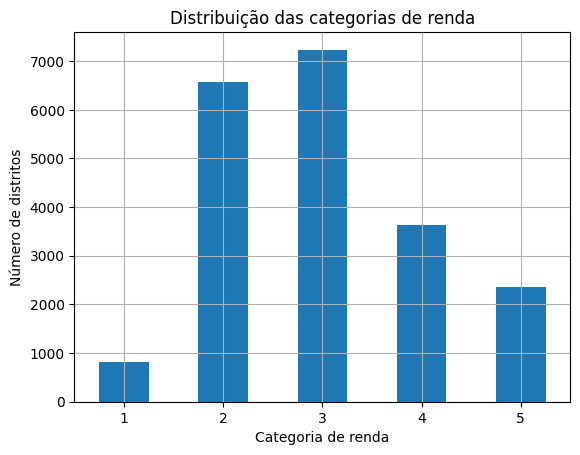

In [330]:
(
    housing["income_cat"].value_counts()  # Conta quantas ocorrências há em cada categoria de renda.
    .sort_index()                         # Organiza na ordem dos índices das categorias (de 1 a 5).
    .plot.bar(                            # Cria um gráfico de barras.
        rot=0,                            # Mantém os rótulos do eixo X na horizontal (sem rotação).
        grid=True                          # Adiciona uma grade no fundo do gráfico.
    )
)

# 🔧 Configurações dos rótulos e título do gráfico.
plt.xlabel("Categoria de renda")           # Define o rótulo do eixo X.
plt.ylabel("Número de distritos")          # Define o rótulo do eixo Y.
plt.title("Distribuição das categorias de renda")  # Adiciona um título ao gráfico.

# 🔥 Exibe o gráfico.
plt.show()

Agora estamos prontos para realizar uma **amostragem estratificada** baseada na categoria de renda. O Scikit-Learn oferece ferramentas específicas para isso. Podemos utilizar o ``StratifiedShuffleSplit`` do Scikit-Learn:

In [331]:
# Importa a classe StratifiedShuffleSplit do módulo model_selection do sklearn
# Esta classe realiza divisões estratificadas dos dados preservando a proporção das classes
from sklearn.model_selection import StratifiedShuffleSplit

# Cria uma instância do StratifiedShuffleSplit com os seguintes parâmetros:
# - n_splits=10: gera 1 divisão dos dados
# - test_size=0.2: 20% dos dados serão usados para teste em cada divisão
# - random_state=42: semente aleatória para reprodutibilidade
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Loop sobre cada divisão gerada pelo splitter:
# - housing: DataFrame completo com os dados
# - housing["income_cat"]: coluna usada para estratificação (garante proporção igual em treino/teste)
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    # Cria conjunto de treino usando os índices gerados
    strat_train_set = housing.iloc[train_index]
    
    # Cria conjunto de teste usando os índices gerados
    strat_test_set = housing.iloc[test_index]

Podemos ver as proporções da categoria de renda no conjunto de testes:

In [336]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

### Análise Comparativa de Amostragem Estratificada vs Aleatória

In [337]:
def income_cat_proportions(data):
    """Calcula as proporções das categorias de renda em um conjunto de dados.
    
    Parâmetros:
        data (DataFrame): Conjunto de dados contendo a coluna 'income_cat'
        
    Retorna:
        Series: Proporções de cada categoria de renda
    """
    return data["income_cat"].value_counts() / len(data)

In [338]:
# Divide os dados de forma aleatória (não estratificada)
# test_size=0.2 → 20% para teste, 80% para treino
# random_state=42 → garante reprodutibilidade
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Cria DataFrame comparativo das proporções:
# - Overall: Proporções no dataset completo
# - Stratified: Proporções no teste estratificado
# - Random: Proporções no teste aleatório
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

# Calcula os erros percentuais das amostragens:
# - Rand. %error: Diferença percentual da amostragem aleatória
# - Strat. %error: Diferença percentual da amostragem estratificada
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

# Exibe a tabela comparativa
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


É possível medir as proporções das categorias de renda no conjunto de dados completo. A figura acima compara essas proporções em três cenários: (1) no dataset original, (2) no conjunto de teste gerado por amostragem estratificada e (3) no conjunto de teste criado com divisão puramente aleatória. Os resultados mostram que a **amostragem estratificada** preserva proporções quase idênticas às do dataset original, enquanto a divisão aleatória apresenta distorções significativas (*skew*). Isso demonstra a superioridade da estratificação para manter a representatividade estatística, especialmente em análises onde o balanceamento das categorias é crítico.  

## Atividade

**Exercício de Pré-processamento**  
Você irá:  
Baixar o dataset Iris diretamente do repositório online usando `fetch_openml`:
```python
import pandas as pd
from sklearn.datasets import fetch_openml

# Carregando dataset online (formato TGZ implícito)
iris = fetch_openml('iris', version=1, as_frame=True)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
```
**Questões:**
1. Aplicar **escalonamento** (à escolha: padronização ou normalização)  
2. Dividir em treino/teste com **dois métodos** (aleatório e estratificado)  
3. Verifique as proporções das classes em cada conjunto  

**Dica:** Compare os resultados dos dois métodos de divisão para entender o impacto da estratificação em dados balanceados. O relatório final deve mostrar as métricas de proporção antes/depois do processamento.